In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
# data processing, CSV file I/O (e.g. pd.read_csv)
 
#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
 
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns
import missingno as msno 
#for visualizing missing data

In [9]:
data = pd.read_csv(r"C:\Users\Shreyas\Downloads\application_record.csv")
data

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
3                1                0           1           1     Sales staff   
4                1                0           1           1     Sales staff   
...            ...              ...         ...         ...             ...   
438552           1                0           0           0             NaN   
438553           1                0           0           0        Laborers   
438554           1                1           0           0     Sales staff   
438555           1                0           0           0             NaN   
438556           1                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
3                   1.0  
4                   1.0  
...                 ...  
438552              1.0  
438553              1.0  
438554              1.0  
43855

In [10]:
data.describe(include='all')

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  \
count   4.385570e+05      438557       438557          438557  438557.000000   
unique           NaN           2            2               2            NaN   
top              NaN           F            N               Y            NaN   
freq             NaN      294440       275459          304074            NaN   
mean    6.022176e+06         NaN          NaN             NaN       0.427390   
std     5.716370e+05         NaN          NaN             NaN       0.724882   
min     5.008804e+06         NaN          NaN             NaN       0.000000   
25%     5.609375e+06         NaN          NaN             NaN       0.000000   
50%     6.047745e+06         NaN          NaN             NaN       0.000000   
75%     6.456971e+06         NaN          NaN             NaN       1.000000   
max     7.999952e+06         NaN          NaN             NaN      19.000000   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count       4.385570e+05           438557                         438557   
unique               NaN                5                              5   
top                  NaN          Working  Secondary / secondary special   
freq                 NaN           226104                         301821   
mean        1.875243e+05              NaN                            NaN   
std         1.100869e+05              NaN                            NaN   
min         2.610000e+04              NaN                            NaN   
25%         1.215000e+05              NaN                            NaN   
50%         1.607805e+05              NaN                            NaN   
75%         2.250000e+05              NaN                            NaN   
max         6.750000e+06              NaN                            NaN   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE     DAYS_BIRTH  DAYS_EMPLOYED  \
count              438557             438557  438557.000000  438557.000000   
unique                  5                  6            NaN            NaN   
top               Married  House / apartment            NaN            NaN   
freq               299828             393831            NaN            NaN   
mean                  NaN                NaN  -15997.904649   60563.675328   
std                   NaN                NaN    4185.030007  138767.799647   
min                   NaN                NaN  -25201.000000  -17531.000000   
25%                   NaN                NaN  -19483.000000   -3103.000000   
50%                   NaN                NaN  -15630.000000   -1467.000000   
75%                   NaN                NaN  -12514.000000    -371.000000   
max                   NaN                NaN   -7489.000000  365243.000000   

        FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE     FLAG_EMAIL  \
count     438557.0    438557.000000  438557.000000  438557.000000   
unique         NaN              NaN            NaN            NaN   
top            NaN              NaN            NaN            NaN   
freq           NaN              NaN            NaN            NaN   
mean           1.0         0.206133       0.287771       0.108207   
std            0.0         0.404527       0.452724       0.310642   
min            1.0         0.000000       0.000000       0.000000   
25%            1.0         0.000000       0.000000       0.000000   
50%            1.0         0.000000       0.000000       0.000000   
75%            1.0         0.000000       1.000000       0.000000   
max            1.0         1.000000       1.000000       1.000000   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  
count           304354    438557.000000  
unique              18              NaN  
top           Laborers              NaN  
freq             78240              NaN  
mean               NaN         2.194465  
std                NaN         0.897207  
min                NaN         1.000000  
25%                NaN         2.000000  


In [11]:
print("Number of datapoints for application records: {}".format(len(data)))
print("Number of unique clients in dataset: {}".format(len(data.ID.unique())))

Number of datapoints for application records: 438557
Number of unique clients in dataset: 438510


In [12]:
(f'Number of unique clients in dataset : {len(data.ID.unique())}')

'Number of unique clients in dataset : 438510'

In [13]:
records = pd.read_csv(r"C:\Users\Shreyas\Downloads\credit_record.csv")
records

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

In [14]:
print("Number of datapoints for credit records: {}".format(len(records)))
print("Number of unique clients in dataset: {}".format(len(records.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


In [15]:
len(set(records['ID']).intersection(set(data['ID'])))

36457

In [16]:
data.duplicated().sum()

0

In [17]:
print(f'Duplicates in application data : {data.iloc[:,1:].duplicated().sum()}, ({np.round(100*data.iloc[:,1:].duplicated().sum()/len(data),1)}%)')
print('')
print(f'Duplicates in records data : {records.duplicated().sum()},({np.round(100*records.duplicated().sum()/len(records),1)}%)')

Duplicates in application data : 348472, (79.5%)

Duplicates in records data : 0,(0.0%)


In [18]:
data = data.drop_duplicates(subset=data.columns[1:],keep='first')

In [19]:
data.shape

(90085, 18)

In [20]:
len(set(records['ID']).intersection(set(data['ID'])))

9709

In [21]:
[(col,data[col].nunique()) for col in data.columns]

[('ID', 90085),
 ('CODE_GENDER', 2),
 ('FLAG_OWN_CAR', 2),
 ('FLAG_OWN_REALTY', 2),
 ('CNT_CHILDREN', 12),
 ('AMT_INCOME_TOTAL', 866),
 ('NAME_INCOME_TYPE', 5),
 ('NAME_EDUCATION_TYPE', 5),
 ('NAME_FAMILY_STATUS', 5),
 ('NAME_HOUSING_TYPE', 6),
 ('DAYS_BIRTH', 16379),
 ('DAYS_EMPLOYED', 9406),
 ('FLAG_MOBIL', 1),
 ('FLAG_WORK_PHONE', 2),
 ('FLAG_PHONE', 2),
 ('FLAG_EMAIL', 2),
 ('OCCUPATION_TYPE', 18),
 ('CNT_FAM_MEMBERS', 13)]

In [22]:
unique_counts = pd.DataFrame.from_records([(col,data[col].nunique()) for col in data.columns],
                                          columns = ['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
12           FLAG_MOBIL           1
1           CODE_GENDER           2
2          FLAG_OWN_CAR           2
3       FLAG_OWN_REALTY           2
15           FLAG_EMAIL           2
14           FLAG_PHONE           2
13      FLAG_WORK_PHONE           2
8    NAME_FAMILY_STATUS           5
6      NAME_INCOME_TYPE           5
7   NAME_EDUCATION_TYPE           5
9     NAME_HOUSING_TYPE           6
4          CNT_CHILDREN          12
17      CNT_FAM_MEMBERS          13
16      OCCUPATION_TYPE          18
5      AMT_INCOME_TOTAL         866
11        DAYS_EMPLOYED        9406
10           DAYS_BIRTH       16379
0                    ID       90085

In [23]:
unique_counts = pd.DataFrame.from_records([(col,records[col].nunique()) for col in records.columns],
                                          columns = ['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
2          STATUS           8
1  MONTHS_BALANCE          61
0              ID       45985

In [24]:
data['FLAG_MOBIL'].unique()

array([1], dtype=int64)

In [25]:
data.drop(['FLAG_MOBIL'],axis=1,inplace=True)

In [26]:
data.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0   5008804           M            Y               Y             0   
2   5008806           M            Y               Y             0   
3   5008808           F            N               Y             0   
7   5008812           F            N               Y             0   
10  5008815           M            Y               Y             0   

    AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0           427500.0               Working               Higher education   
2           112500.0               Working  Secondary / secondary special   
3           270000.0  Commercial associate  Secondary / secondary special   
7           283500.0             Pensioner               Higher education   
10          270000.0               Working               Higher education   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         Civil marriage   Rented apartment      -12005          -4542   
2                Married  House / apartment      -21474          -1134   
3   Single / not married  House / apartment      -19110          -3051   
7              Separated  House / apartment      -22464         365243   
10               Married  House / apartment      -16872           -769   

    FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  
0                 1           0           0             NaN              2.0  
2                 0           0           0  Security staff              2.0  
3                 0           1           1     Sales staff              1.0  
7                 0           0           0             NaN              1.0  
10                1           1           1     Accountants              2.0

In [27]:
data.shape

(90085, 17)

In [28]:
data.isnull().sum()/len(data)*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.501193
CNT_FAM_MEMBERS         0.000000
dtype: float64

In [29]:
data.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 16624
Sales staff               9123
Core staff                8091
Managers                  6675
Drivers                   5860
High skill tech staff     3357
Accountants               3034
Medicine staff            2484
Cooking staff             1764
Security staff            1740
Cleaning staff            1222
Private service staff      750
Low-skill Laborers         569
Secretaries                412
Waiters/barmen staff       393
Realty agents              218
HR staff                   167
IT staff                   125
Name: count, dtype: int64

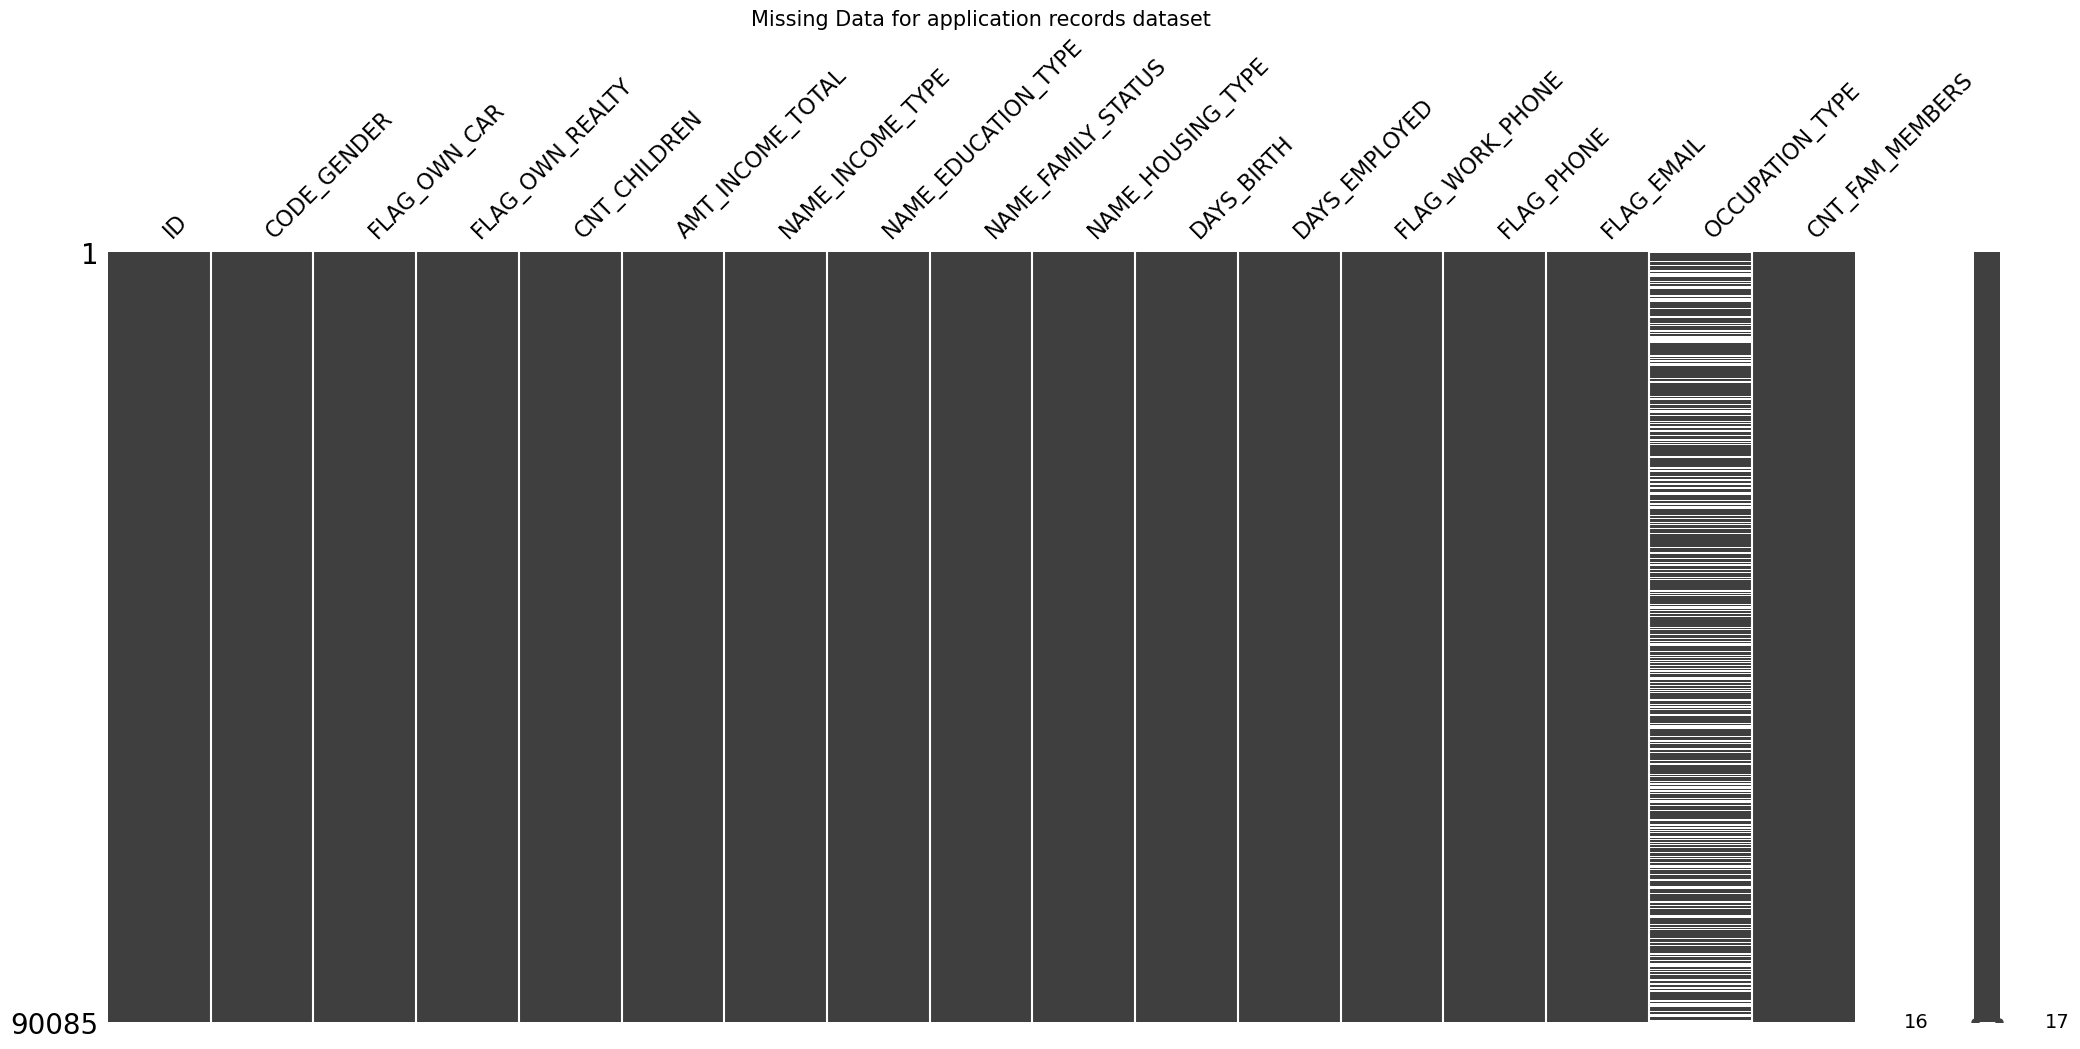

In [30]:
missing = msno.matrix(data)
missing.set_title('Missing Data for application records dataset',fontsize=15);

In [31]:
records.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

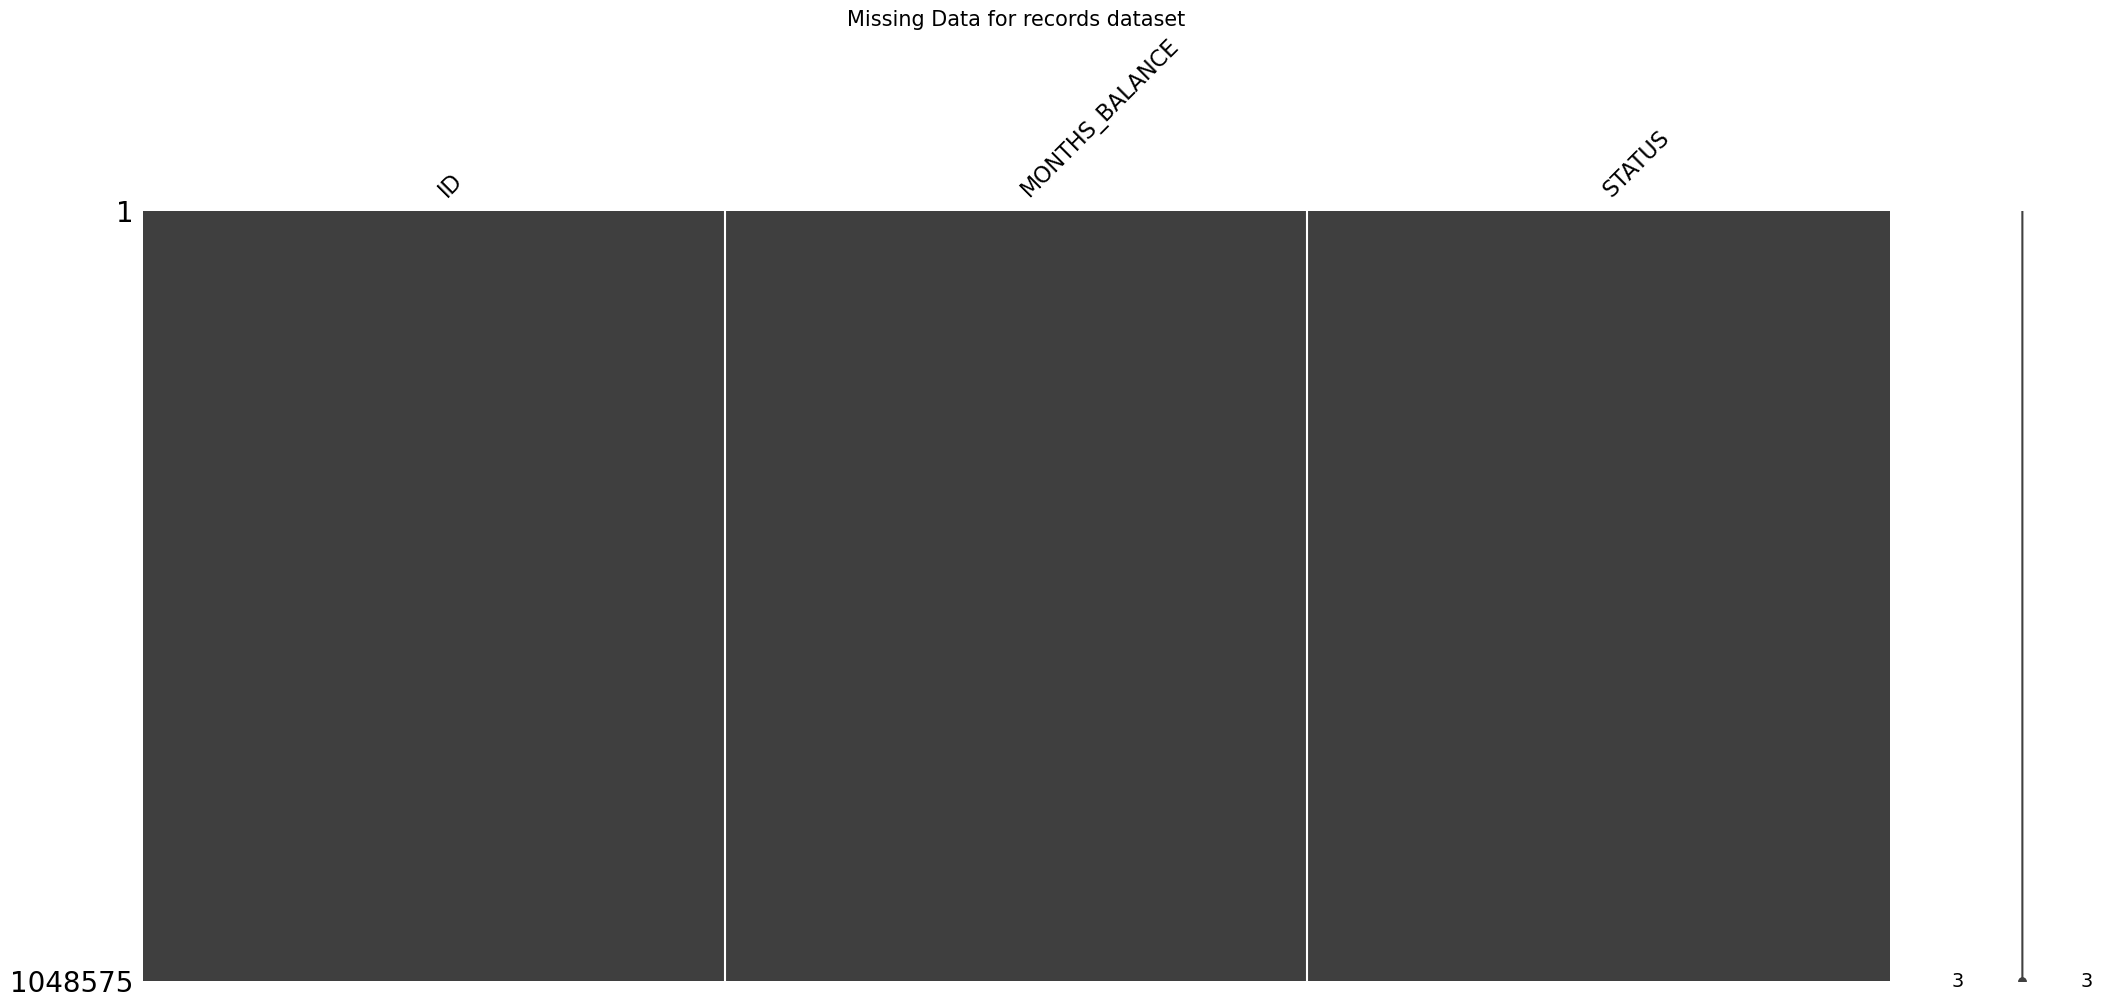

In [32]:
missing2 = msno.matrix(records)
missing2.set_title('Missing Data for records dataset',fontsize=15);

In [33]:
data.OCCUPATION_TYPE.value_counts()/len(data)*100

OCCUPATION_TYPE
Laborers                 18.453683
Sales staff              10.127102
Core staff                8.981517
Managers                  7.409669
Drivers                   6.504968
High skill tech staff     3.726481
Accountants               3.367930
Medicine staff            2.757396
Cooking staff             1.958151
Security staff            1.931509
Cleaning staff            1.356497
Private service staff     0.832547
Low-skill Laborers        0.631626
Secretaries               0.457346
Waiters/barmen staff      0.436255
Realty agents             0.241994
HR staff                  0.185380
IT staff                  0.138758
Name: count, dtype: float64

In [34]:
data['OCCUPATION_TYPE'].fillna(value='other',inplace=True)

In [35]:
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [36]:
records.STATUS.value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [37]:
# target=1 (high risk) if there is at least
# one month where user is late on payments by 30 days or more

records['target'] = records['STATUS']
records['target'].replace('X',0,inplace =True)
records['target'].replace('C',0,inplace =True)
records['target'] = records['target'].astype(int)
records.loc[records['target']>=1,'target'] = 1
records

ID  MONTHS_BALANCE STATUS  target
0        5001711               0      X       0
1        5001711              -1      0       0
2        5001711              -2      0       0
3        5001711              -3      0       0
4        5001712               0      C       0
...          ...             ...    ...     ...
1048570  5150487             -25      C       0
1048571  5150487             -26      C       0
1048572  5150487             -27      C       0
1048573  5150487             -28      C       0
1048574  5150487             -29      C       0

[1048575 rows x 4 columns]

In [38]:
records.target.value_counts()

target
0    1034381
1      14194
Name: count, dtype: int64

print('Number of datapoints for application records : {}'.format(len(records)))
print('Number of 

In [39]:
df = pd.DataFrame(records.groupby(['ID'])['target'].agg(max)).reset_index()

In [40]:
df.head()

ID  target
0  5001711       0
1  5001712       0
2  5001713       0
3  5001714       0
4  5001715       0

In [41]:
df.target.value_counts()

target
0    40635
1     5350
Name: count, dtype: int64

In [42]:
new_df = pd.merge(data, df , how='inner',on = ['ID'])
new_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0     5008804           M            Y               Y             0   
1     5008806           M            Y               Y             0   
2     5008808           F            N               Y             0   
3     5008812           F            N               Y             0   
4     5008815           M            Y               Y             0   
...       ...         ...          ...             ...           ...   
9704  5148694           F            N               N             0   
9705  5149055           F            N               Y             0   
9706  5149729           M            Y               Y             0   
9707  5149838           F            N               Y             0   
9708  5150337           M            N               Y             0   

      AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             427500.0               Working               Higher education   
1             112500.0               Working  Secondary / secondary special   
2             270000.0  Commercial associate  Secondary / secondary special   
3             283500.0             Pensioner               Higher education   
4             270000.0               Working               Higher education   
...                ...                   ...                            ...   
9704          180000.0             Pensioner  Secondary / secondary special   
9705          112500.0  Commercial associate  Secondary / secondary special   
9706           90000.0               Working  Secondary / secondary special   
9707          157500.0             Pensioner               Higher education   
9708          112500.0               Working  Secondary / secondary special   

        NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0           Civil marriage     Rented apartment      -12005          -4542   
1                  Married    House / apartment      -21474          -1134   
2     Single / not married    House / apartment      -19110          -3051   
3                Separated    House / apartment      -22464         365243   
4                  Married    House / apartment      -16872           -769   
...                    ...                  ...         ...            ...   
9704        Civil marriage  Municipal apartment      -20600           -198   
9705               Married    House / apartment      -15837          -2694   
9706               Married    House / apartment      -19101          -1721   
9707               Married    House / apartment      -12387          -1325   
9708  Single / not married     Rented apartment       -9188          -1193   

      FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                   1           0           0           other   
1                   0           0           0  Security staff   
2                   0           1           1     Sales staff   
3                   0           0           0           other   
4                   1           1           1     Accountants   
...               ...         ...         ...             ...   
9704                0           0           0        Laborers   
9705                1           1           0           other   
9706                0           0           0           other   
9707                0           1           1  Medicine staff   
9708                0           0           0        Laborers   

      CNT_FAM_MEMBERS  target  
0                 2.0       1  
1                 2.0       0  
2                 1.0       0  
3                 1.0       0  
4                 2.0       0  
...               ...     ...  
9704              2.0       1  
9705              2.0       1  
9706              2.0       1  
9707              2.0       1  
9708              1.0       1  

[9709 rows x 18 columns]

In [43]:
new_df.shape

(9709, 18)

In [44]:
# Extracting how many months account has been open for
start_df = pd.DataFrame(records.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()
start_df

ID  MONTHS_BALANCE
0      5001711              -3
1      5001712             -18
2      5001713             -21
3      5001714             -14
4      5001715             -59
...        ...             ...
45980  5150482             -28
45981  5150483             -17
45982  5150484             -12
45983  5150485              -1
45984  5150487             -29

[45985 rows x 2 columns]

In [45]:
# rename column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'},inplace=True)
start_df

ID  ACCOUNT_LENGTH
0      5001711              -3
1      5001712             -18
2      5001713             -21
3      5001714             -14
4      5001715             -59
...        ...             ...
45980  5150482             -28
45981  5150483             -17
45982  5150484             -12
45983  5150485              -1
45984  5150487             -29

[45985 rows x 2 columns]

In [46]:
start_df['ACCOUNT_LENGTH']=-start_df['ACCOUNT_LENGTH']

In [47]:
start_df

ID  ACCOUNT_LENGTH
0      5001711               3
1      5001712              18
2      5001713              21
3      5001714              14
4      5001715              59
...        ...             ...
45980  5150482              28
45981  5150483              17
45982  5150484              12
45983  5150485               1
45984  5150487              29

[45985 rows x 2 columns]

In [48]:
#Merge dataframes on ID
new_df = pd.merge(new_df, start_df, how='inner', on=['ID'])
new_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0     5008804           M            Y               Y             0   
1     5008806           M            Y               Y             0   
2     5008808           F            N               Y             0   
3     5008812           F            N               Y             0   
4     5008815           M            Y               Y             0   
...       ...         ...          ...             ...           ...   
9704  5148694           F            N               N             0   
9705  5149055           F            N               Y             0   
9706  5149729           M            Y               Y             0   
9707  5149838           F            N               Y             0   
9708  5150337           M            N               Y             0   

      AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             427500.0               Working               Higher education   
1             112500.0               Working  Secondary / secondary special   
2             270000.0  Commercial associate  Secondary / secondary special   
3             283500.0             Pensioner               Higher education   
4             270000.0               Working               Higher education   
...                ...                   ...                            ...   
9704          180000.0             Pensioner  Secondary / secondary special   
9705          112500.0  Commercial associate  Secondary / secondary special   
9706           90000.0               Working  Secondary / secondary special   
9707          157500.0             Pensioner               Higher education   
9708          112500.0               Working  Secondary / secondary special   

        NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0           Civil marriage     Rented apartment      -12005          -4542   
1                  Married    House / apartment      -21474          -1134   
2     Single / not married    House / apartment      -19110          -3051   
3                Separated    House / apartment      -22464         365243   
4                  Married    House / apartment      -16872           -769   
...                    ...                  ...         ...            ...   
9704        Civil marriage  Municipal apartment      -20600           -198   
9705               Married    House / apartment      -15837          -2694   
9706               Married    House / apartment      -19101          -1721   
9707               Married    House / apartment      -12387          -1325   
9708  Single / not married     Rented apartment       -9188          -1193   

      FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                   1           0           0           other   
1                   0           0           0  Security staff   
2                   0           1           1     Sales staff   
3                   0           0           0           other   
4                   1           1           1     Accountants   
...               ...         ...         ...             ...   
9704                0           0           0        Laborers   
9705                1           1           0           other   
9706                0           0           0           other   
9707                0           1           1  Medicine staff   
9708                0           0           0        Laborers   

      CNT_FAM_MEMBERS  target  ACCOUNT_LENGTH  
0                 2.0       1              15  
1                 2.0       0              29  
2                 1.0       0               4  
3                 1.0       0              20  
4                 2.0       0               5  
...               ...     ...             ...  
9704              2.0       1              20  
9705              2.0       1              19  
9706              2.0       1              21  

In [49]:
new_df.shape

(9709, 19)

In [50]:
new_df.describe(include='all')

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
count   9.709000e+03        9709         9709            9709   9709.000000   
unique           NaN           2            2               2           NaN   
top              NaN           F            N               Y           NaN   
freq             NaN        6323         6139            6520           NaN   
mean    5.076105e+06         NaN          NaN             NaN      0.422804   
std     4.080270e+04         NaN          NaN             NaN      0.767019   
min     5.008804e+06         NaN          NaN             NaN      0.000000   
25%     5.036955e+06         NaN          NaN             NaN      0.000000   
50%     5.069449e+06         NaN          NaN             NaN      0.000000   
75%     5.112986e+06         NaN          NaN             NaN      1.000000   
max     5.150479e+06         NaN          NaN             NaN     19.000000   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count       9.709000e+03             9709                           9709   
unique               NaN                5                              5   
top                  NaN          Working  Secondary / secondary special   
freq                 NaN             4960                           6761   
mean        1.812282e+05              NaN                            NaN   
std         9.927731e+04              NaN                            NaN   
min         2.700000e+04              NaN                            NaN   
25%         1.125000e+05              NaN                            NaN   
50%         1.575000e+05              NaN                            NaN   
75%         2.250000e+05              NaN                            NaN   
max         1.575000e+06              NaN                            NaN   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                9709               9709   9709.000000    9709.000000   
unique                  5                  6           NaN            NaN   
top               Married  House / apartment           NaN            NaN   
freq                 6530               8684           NaN            NaN   
mean                  NaN                NaN -15991.811618   61732.846328   
std                   NaN                NaN   4246.224468  139656.322958   
min                   NaN                NaN -25152.000000  -15713.000000   
25%                   NaN                NaN -19565.000000   -2995.000000   
50%                   NaN                NaN -15611.000000   -1374.000000   
75%                   NaN                NaN -12440.000000    -339.000000   
max                   NaN                NaN  -7489.000000  365243.000000   

        FLAG_WORK_PHONE   FLAG_PHONE   FLAG_EMAIL OCCUPATION_TYPE  \
count       9709.000000  9709.000000  9709.000000            9709   
unique              NaN          NaN          NaN              19   
top                 NaN          NaN          NaN           other   
freq                NaN          NaN          NaN            2994   
mean           0.217427     0.287671     0.087548             NaN   
std            0.412517     0.452700     0.282650             NaN   
min            0.000000     0.000000     0.000000             NaN   
25%            0.000000     0.000000     0.000000             NaN   
50%            0.000000     0.000000     0.000000             NaN   
75%            0.000000     1.000000     0.000000             NaN   
max            1.000000     1.000000     1.000000             NaN   

        CNT_FAM_MEMBERS       target  ACCOUNT_LENGTH  
count       9709.000000  9709.000000     9709.000000  
unique              NaN          NaN             NaN  
top                 NaN          NaN             NaN  
freq                NaN          NaN             NaN  
mean           2.182614     0.132145       27.270059  
std            0.932918     0.338666       16.648057  
min            1.

In [51]:
# Create age feature
new_df['AGE_YEARS']=round(-new_df['DAYS_BIRTH']/365.2425,0)
new_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0     5008804           M            Y               Y             0   
1     5008806           M            Y               Y             0   
2     5008808           F            N               Y             0   
3     5008812           F            N               Y             0   
4     5008815           M            Y               Y             0   
...       ...         ...          ...             ...           ...   
9704  5148694           F            N               N             0   
9705  5149055           F            N               Y             0   
9706  5149729           M            Y               Y             0   
9707  5149838           F            N               Y             0   
9708  5150337           M            N               Y             0   

      AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             427500.0               Working               Higher education   
1             112500.0               Working  Secondary / secondary special   
2             270000.0  Commercial associate  Secondary / secondary special   
3             283500.0             Pensioner               Higher education   
4             270000.0               Working               Higher education   
...                ...                   ...                            ...   
9704          180000.0             Pensioner  Secondary / secondary special   
9705          112500.0  Commercial associate  Secondary / secondary special   
9706           90000.0               Working  Secondary / secondary special   
9707          157500.0             Pensioner               Higher education   
9708          112500.0               Working  Secondary / secondary special   

        NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0           Civil marriage     Rented apartment      -12005          -4542   
1                  Married    House / apartment      -21474          -1134   
2     Single / not married    House / apartment      -19110          -3051   
3                Separated    House / apartment      -22464         365243   
4                  Married    House / apartment      -16872           -769   
...                    ...                  ...         ...            ...   
9704        Civil marriage  Municipal apartment      -20600           -198   
9705               Married    House / apartment      -15837          -2694   
9706               Married    House / apartment      -19101          -1721   
9707               Married    House / apartment      -12387          -1325   
9708  Single / not married     Rented apartment       -9188          -1193   

      FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                   1           0           0           other   
1                   0           0           0  Security staff   
2                   0           1           1     Sales staff   
3                   0           0           0           other   
4                   1           1           1     Accountants   
...               ...         ...         ...             ...   
9704                0           0           0        Laborers   
9705                1           1           0           other   
9706                0           0           0           other   
9707                0           1           1  Medicine staff   
9708                0           0           0        Laborers   

      CNT_FAM_MEMBERS  target  ACCOUNT_LENGTH  AGE_YEARS  
0                 2.0       1              15       33.0  
1                 2.0       0              29       59.0  
2                 1.0       0               4       52.0  
3                 1.0       0              20       62.0  
4                 2.0       0               5       46.0  
...               ...     ...             ...        ...  
9704              2.0       1              20       56.0  
9705   

In [52]:
new_df['AGE_YEARS'].head

<bound method NDFrame.head of 0       33.0
1       59.0
2       52.0
3       62.0
4       46.0
        ... 
9704    56.0
9705    43.0
9706    52.0
9707    34.0
9708    25.0
Name: AGE_YEARS, Length: 9709, dtype: float64>

In [53]:
new_df.drop(['DAYS_BIRTH'],axis=1,inplace=True)
new_df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008806           M            Y               Y             0   
2  5008808           F            N               Y             0   
3  5008812           F            N               Y             0   
4  5008815           M            Y               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          112500.0               Working  Secondary / secondary special   
2          270000.0  Commercial associate  Secondary / secondary special   
3          283500.0             Pensioner               Higher education   
4          270000.0               Working               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0        Civil marriage   Rented apartment          -4542                1   
1               Married  House / apartment          -1134                0   
2  Single / not married  House / apartment          -3051                0   
3             Separated  House / apartment         365243                0   
4               Married  House / apartment           -769                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  target  \
0           0           0           other              2.0       1   
1           0           0  Security staff              2.0       0   
2           1           1     Sales staff              1.0       0   
3           0           0           other              1.0       0   
4           1           1     Accountants              2.0       0   

   ACCOUNT_LENGTH  AGE_YEARS  
0              15       33.0  
1              29       59.0  
2               4       52.0  
3              20       62.0  
4               5       46.0

In [54]:
new_df.DAYS_EMPLOYED.value_counts()

DAYS_EMPLOYED
 365243    1696
-401         17
-200         17
-126         14
-1022        14
           ... 
-2606         1
-3945         1
-8298         1
-3915         1
-606          1
Name: count, Length: 3637, dtype: int64

In [55]:
n_df = new_df.loc[-new_df['DAYS_EMPLOYED']<0]
n_df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner    1696
Name: count, dtype: int64

In [56]:
new_df['UNEMPLOYED'] =0
new_df.loc[-new_df['DAYS_EMPLOYED']<0,'UNEMPLOYED']=1

In [57]:
new_df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008806           M            Y               Y             0   
2  5008808           F            N               Y             0   
3  5008812           F            N               Y             0   
4  5008815           M            Y               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          112500.0               Working  Secondary / secondary special   
2          270000.0  Commercial associate  Secondary / secondary special   
3          283500.0             Pensioner               Higher education   
4          270000.0               Working               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0        Civil marriage   Rented apartment          -4542                1   
1               Married  House / apartment          -1134                0   
2  Single / not married  House / apartment          -3051                0   
3             Separated  House / apartment         365243                0   
4               Married  House / apartment           -769                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  target  \
0           0           0           other              2.0       1   
1           0           0  Security staff              2.0       0   
2           1           1     Sales staff              1.0       0   
3           0           0           other              1.0       0   
4           1           1     Accountants              2.0       0   

   ACCOUNT_LENGTH  AGE_YEARS  UNEMPLOYED  
0              15       33.0           0  
1              29       59.0           0  
2               4       52.0           0  
3              20       62.0           1  
4               5       46.0           0

In [58]:
new_df['UNEMPLOYED'].value_counts()

UNEMPLOYED
0    8013
1    1696
Name: count, dtype: int64

In [59]:
# Create years employed feature
new_df['YEARS_EMPLOYED']=round(-new_df['DAYS_EMPLOYED']/365.2425,1)
new_df.loc[new_df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
new_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0     5008804           M            Y               Y             0   
1     5008806           M            Y               Y             0   
2     5008808           F            N               Y             0   
3     5008812           F            N               Y             0   
4     5008815           M            Y               Y             0   
...       ...         ...          ...             ...           ...   
9704  5148694           F            N               N             0   
9705  5149055           F            N               Y             0   
9706  5149729           M            Y               Y             0   
9707  5149838           F            N               Y             0   
9708  5150337           M            N               Y             0   

      AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             427500.0               Working               Higher education   
1             112500.0               Working  Secondary / secondary special   
2             270000.0  Commercial associate  Secondary / secondary special   
3             283500.0             Pensioner               Higher education   
4             270000.0               Working               Higher education   
...                ...                   ...                            ...   
9704          180000.0             Pensioner  Secondary / secondary special   
9705          112500.0  Commercial associate  Secondary / secondary special   
9706           90000.0               Working  Secondary / secondary special   
9707          157500.0             Pensioner               Higher education   
9708          112500.0               Working  Secondary / secondary special   

        NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  ...  FLAG_WORK_PHONE  \
0           Civil marriage     Rented apartment  ...                1   
1                  Married    House / apartment  ...                0   
2     Single / not married    House / apartment  ...                0   
3                Separated    House / apartment  ...                0   
4                  Married    House / apartment  ...                1   
...                    ...                  ...  ...              ...   
9704        Civil marriage  Municipal apartment  ...                0   
9705               Married    House / apartment  ...                1   
9706               Married    House / apartment  ...                0   
9707               Married    House / apartment  ...                0   
9708  Single / not married     Rented apartment  ...                0   

      FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE CNT_FAM_MEMBERS  target  \
0              0           0            other             2.0       1   
1              0           0   Security staff             2.0       0   
2              1           1      Sales staff             1.0       0   
3              0           0            other             1.0       0   
4              1           1      Accountants             2.0       0   
...          ...         ...              ...             ...     ...   
9704           0           0         Laborers             2.0       1   
9705           1           0            other             2.0       1   
9706           0           0            other             2.0       1   
9707           1           1   Medicine staff             2.0       1   
9708           0           0         Laborers             1.0       1   

      ACCOUNT_LENGTH  AGE_YEARS  UNEMPLOYED  YEARS_EMPLOYED  
0                 15       33.0           0            12.4  
1                 29       59.0           0             3.1  
2                  4       52.0           0             8.4  
3                 20       62.0           1             0.0  
4                  5       46.0           0             2.1  
...              ...        ...         ...             ...  
9704     

In [60]:
pd.set_option('display.max_columns',None)

In [61]:
new_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0     5008804           M            Y               Y             0   
1     5008806           M            Y               Y             0   
2     5008808           F            N               Y             0   
3     5008812           F            N               Y             0   
4     5008815           M            Y               Y             0   
...       ...         ...          ...             ...           ...   
9704  5148694           F            N               N             0   
9705  5149055           F            N               Y             0   
9706  5149729           M            Y               Y             0   
9707  5149838           F            N               Y             0   
9708  5150337           M            N               Y             0   

      AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             427500.0               Working               Higher education   
1             112500.0               Working  Secondary / secondary special   
2             270000.0  Commercial associate  Secondary / secondary special   
3             283500.0             Pensioner               Higher education   
4             270000.0               Working               Higher education   
...                ...                   ...                            ...   
9704          180000.0             Pensioner  Secondary / secondary special   
9705          112500.0  Commercial associate  Secondary / secondary special   
9706           90000.0               Working  Secondary / secondary special   
9707          157500.0             Pensioner               Higher education   
9708          112500.0               Working  Secondary / secondary special   

        NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  DAYS_EMPLOYED  \
0           Civil marriage     Rented apartment          -4542   
1                  Married    House / apartment          -1134   
2     Single / not married    House / apartment          -3051   
3                Separated    House / apartment         365243   
4                  Married    House / apartment           -769   
...                    ...                  ...            ...   
9704        Civil marriage  Municipal apartment           -198   
9705               Married    House / apartment          -2694   
9706               Married    House / apartment          -1721   
9707               Married    House / apartment          -1325   
9708  Single / not married     Rented apartment          -1193   

      FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                   1           0           0           other   
1                   0           0           0  Security staff   
2                   0           1           1     Sales staff   
3                   0           0           0           other   
4                   1           1           1     Accountants   
...               ...         ...         ...             ...   
9704                0           0           0        Laborers   
9705                1           1           0           other   
9706                0           0           0           other   
9707                0           1           1  Medicine staff   
9708                0           0           0        Laborers   

      CNT_FAM_MEMBERS  target  ACCOUNT_LENGTH  AGE_YEARS  UNEMPLOYED  \
0                 2.0       1              15       33.0           0   
1                 2.0       0              29       59.0           0   
2                 1.0       0               4       52.0           0   
3                 1.0       0              20       62.0           1   
4                 2.0       0               5       46.0           0   
...               ...     ...             ...        ...         ...   
9704              2.0       1              20       56.0           0   
9705              2.0       1              19  

In [62]:
new_df.drop(['DAYS_EMPLOYED'],axis=1,inplace=True)

In [63]:
new_df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008806           M            Y               Y             0   
2  5008808           F            N               Y             0   
3  5008812           F            N               Y             0   
4  5008815           M            Y               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          112500.0               Working  Secondary / secondary special   
2          270000.0  Commercial associate  Secondary / secondary special   
3          283500.0             Pensioner               Higher education   
4          270000.0               Working               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_WORK_PHONE  FLAG_PHONE  \
0        Civil marriage   Rented apartment                1           0   
1               Married  House / apartment                0           0   
2  Single / not married  House / apartment                0           1   
3             Separated  House / apartment                0           0   
4               Married  House / apartment                1           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  target  ACCOUNT_LENGTH  \
0           0           other              2.0       1              15   
1           0  Security staff              2.0       0              29   
2           1     Sales staff              1.0       0               4   
3           0           other              1.0       0              20   
4           1     Accountants              2.0       0               5   

   AGE_YEARS  UNEMPLOYED  YEARS_EMPLOYED  
0       33.0           0            12.4  
1       59.0           0             3.1  
2       52.0           0             8.4  
3       62.0           1             0.0  
4       46.0           0             2.1

In [64]:
new_df = new_df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car',
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type','FLAG_WORK_PHONE':'Work_phone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed','YEARS_EMPLOYED':'Years_employed'})

In [65]:
new_df

ID Gender Own_car Own_property  Num_children  Total_income  \
0     5008804      M       Y            Y             0      427500.0   
1     5008806      M       Y            Y             0      112500.0   
2     5008808      F       N            Y             0      270000.0   
3     5008812      F       N            Y             0      283500.0   
4     5008815      M       Y            Y             0      270000.0   
...       ...    ...     ...          ...           ...           ...   
9704  5148694      F       N            N             0      180000.0   
9705  5149055      F       N            Y             0      112500.0   
9706  5149729      M       Y            Y             0       90000.0   
9707  5149838      F       N            Y             0      157500.0   
9708  5150337      M       N            Y             0      112500.0   

               Income_type                 Education_type  \
0                  Working               Higher education   
1                  Working  Secondary / secondary special   
2     Commercial associate  Secondary / secondary special   
3                Pensioner               Higher education   
4                  Working               Higher education   
...                    ...                            ...   
9704             Pensioner  Secondary / secondary special   
9705  Commercial associate  Secondary / secondary special   
9706               Working  Secondary / secondary special   
9707             Pensioner               Higher education   
9708               Working  Secondary / secondary special   

             Family_status         Housing_type  Work_phone  Phone  Email  \
0           Civil marriage     Rented apartment           1      0      0   
1                  Married    House / apartment           0      0      0   
2     Single / not married    House / apartment           0      1      1   
3                Separated    House / apartment           0      0      0   
4                  Married    House / apartment           1      1      1   
...                    ...                  ...         ...    ...    ...   
9704        Civil marriage  Municipal apartment           0      0      0   
9705               Married    House / apartment           1      1      0   
9706               Married    House / apartment           0      0      0   
9707               Married    House / apartment           0      1      1   
9708  Single / not married     Rented apartment           0      0      0   

     Occupation_type  Num_family  Target  Account_length   Age  Unemployed  \
0              other         2.0       1              15  33.0           0   
1     Security staff         2.0       0              29  59.0           0   
2        Sales staff         1.0       0               4  52.0           0   
3              other         1.0       0              20  62.0           1   
4        Accountants         2.0       0               5  46.0           0   
...              ...         ...     ...             ...   ...         ...   
9704        Laborers         2.0       1              20  56.0           0   
9705           other         2.0       1              19  43.0           0   
9706           other         2.0       1              21  52.0           0   
9707  Medicine staff         2.0       1              32  34.0           0   
9708        Laborers         1.0       1              13  25.0           0   

      Years_employed  
0               12.4  
1                3.1  
2                8.4  
3                0.0  
4                2.1  
...              ...  
9704             0.5  
9705             7.4  
9706             4.7  
9707             3.6  
9708             3.3  

[9709 rows x 20 columns]

In [66]:
new_df.dtypes

ID                   int64
Gender              object
Own_car             object
Own_property        object
Num_children         int64
Total_income       float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Work_phone           int64
Phone                int64
Email                int64
Occupation_type     object
Num_family         float64
Target               int32
Account_length       int64
Age                float64
Unemployed           int64
Years_employed     float64
dtype: object

In [67]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,
    "figure.autolayout":True})
 
palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']
 
sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

<Figure size 1000x1000 with 0 Axes>

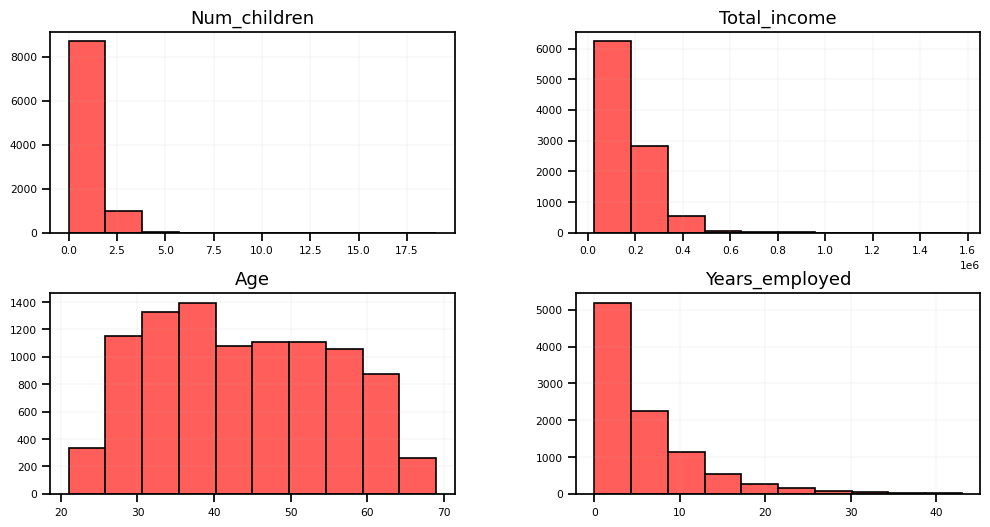

In [68]:
plt.figure(figsize=(10,10))

cols_to_plot = ["Num_children","Total_income","Age","Years_employed"]
new_df[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

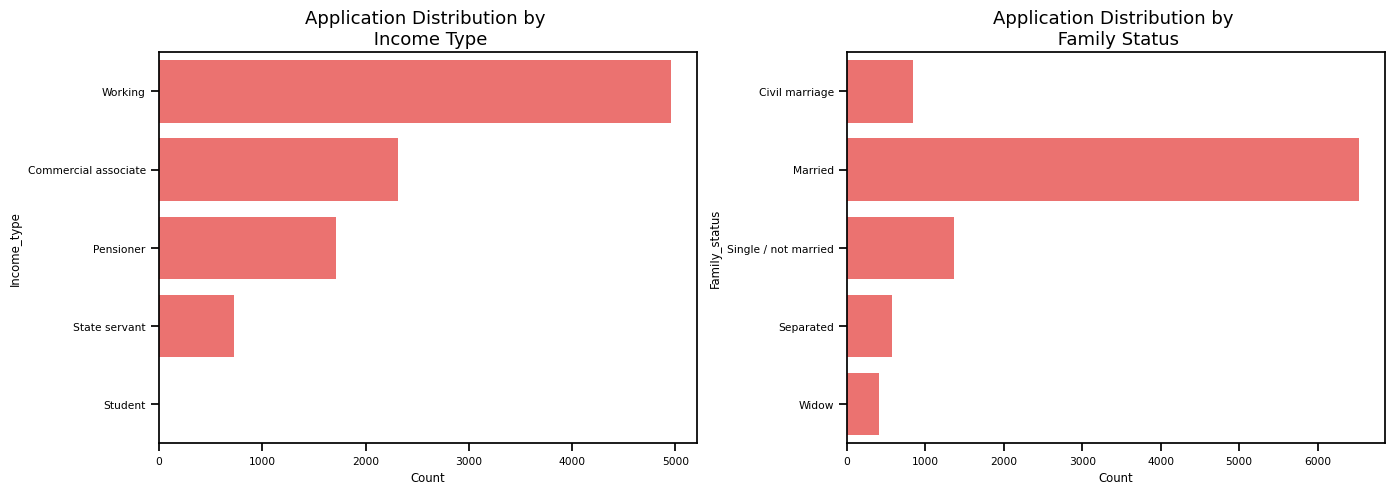

In [69]:
fig,axes=plt.subplots(1,2)
g1=sns.countplot(y=new_df.Income_type,linewidth=1.2,ax=axes[0])
g1.set_title("Application Distribution by \n Income Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=new_df.Family_status,linewidth=1.2,ax=axes[1])
g2.set_title("Application Distribution by \n Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

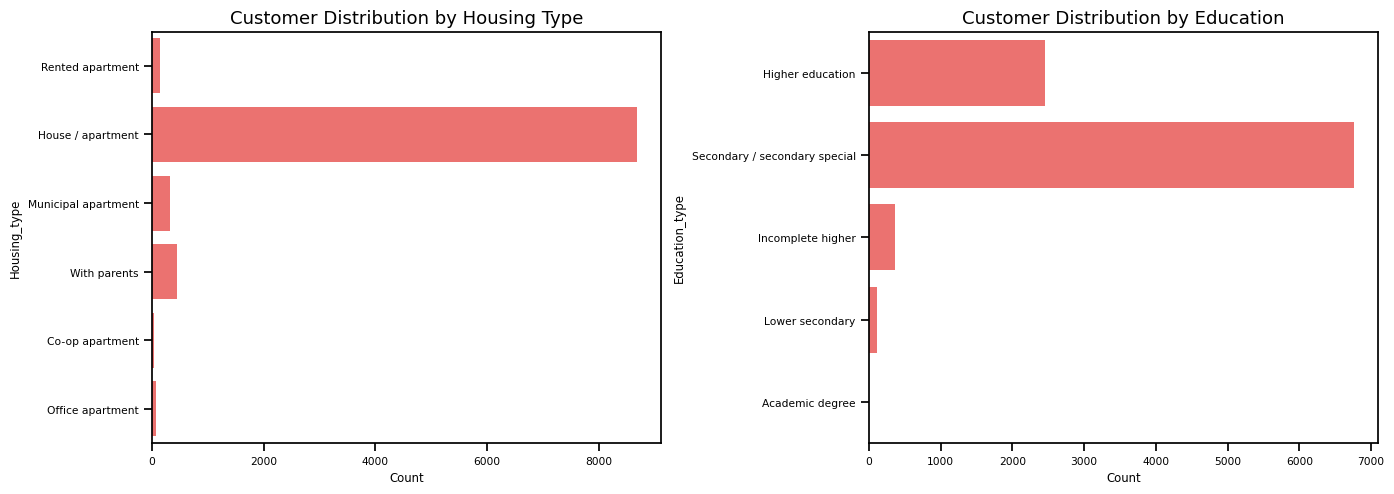

In [70]:
fig,axes=plt.subplots(1,2)
g1=sns.countplot(y=new_df.Housing_type,linewidth=1.2,ax=axes[0])
g1.set_title("Customer Distribution by Housing Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=new_df.Education_type,linewidth=1.2,ax=axes[1])
g2.set_title("Customer Distribution by Education")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

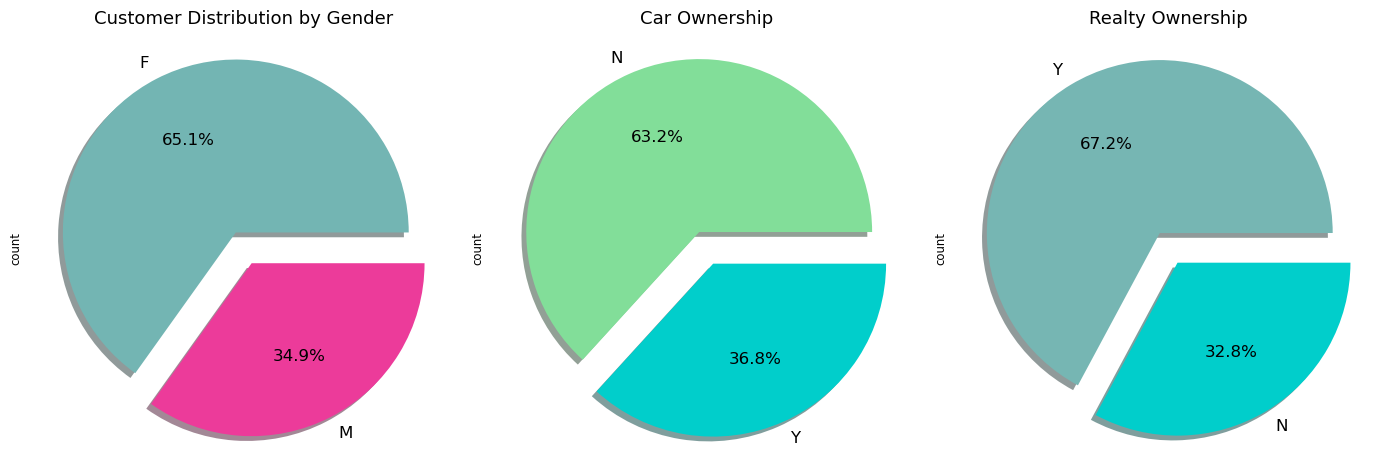

In [71]:
fig, axes = plt.subplots(1,3)
 
g1= new_df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#73B5B3","#EC3B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")
 
g2= new_df['Own_car'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#82DE99","#01CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")
 
g3= new_df['Own_property'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B6B3","#01CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")
 
fig.set_size_inches(14,5)
 
plt.tight_layout()
 
plt.show()

In [72]:
object_columns = new_df.columns[new_df.dtypes =='object'].tolist()
#object columns in dataset

unique_counts = pd.DataFrame.from_records([(col, new_df[object_columns][col].nunique()) for col in new_df[object_columns].columns],
                                          columns =['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
0           Gender           2
1          Own_car           2
2     Own_property           2
3      Income_type           5
4   Education_type           5
5    Family_status           5
6     Housing_type           6
7  Occupation_type          19

In [73]:
# Checking unique values from categorical columns

for i in new_df.columns[(new_df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(new_df[i].value_counts())
    print('--------------------------------')

Gender 

Gender
F    6323
M    3386
Name: count, dtype: int64
--------------------------------
Own_car 

Own_car
N    6139
Y    3570
Name: count, dtype: int64
--------------------------------
Own_property 

Own_property
Y    6520
N    3189
Name: count, dtype: int64
--------------------------------
Income_type 

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64
--------------------------------
Education_type 

Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64
--------------------------------
Family_status 

Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dt

In [74]:
new_df['Gender'] = new_df['Gender'].replace(['F','M'],[0,1])
new_df['Own_car'] = new_df['Own_car'].replace(['Y','N'],[0,1])
new_df['Own_property'] = new_df['Own_property'].replace(['Y','N'],[0,1])

In [75]:
new_df.head(2)

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0  5008804       1        0             0             0      427500.0   
1  5008806       1        0             0             0      112500.0   

  Income_type                 Education_type   Family_status  \
0     Working               Higher education  Civil marriage   
1     Working  Secondary / secondary special         Married   

        Housing_type  Work_phone  Phone  Email Occupation_type  Num_family  \
0   Rented apartment           1      0      0           other         2.0   
1  House / apartment           0      0      0  Security staff         2.0   

   Target  Account_length   Age  Unemployed  Years_employed  
0       1              15  33.0           0            12.4  
1       0              29  59.0           0             3.1

In [76]:
new_df.Income_type.unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [77]:
new_df['Is_Working'] = new_df['Income_type'].replace(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'],[1,1,0,1,0])

new_df['Marital_status'] = new_df['Family_status'].replace(['Civil marriage','Married','Single / not married',
                                                            'Separated','Widow'],[1,1,0,0,0])

In [78]:
new_df.head(20)

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0   5008804       1        0             0             0      427500.0   
1   5008806       1        0             0             0      112500.0   
2   5008808       0        1             0             0      270000.0   
3   5008812       0        1             0             0      283500.0   
4   5008815       1        0             0             0      270000.0   
5   5008819       1        0             0             0      135000.0   
6   5008825       0        0             1             0      130500.0   
7   5008830       0        1             0             0      157500.0   
8   5008834       0        1             0             1      112500.0   
9   5008836       1        0             0             3      270000.0   
10  5008838       1        1             0             1      405000.0   
11  5008844       1        0             0             0      112500.0   
12  5008854       0        0             0             2      135000.0   
13  5008868       0        1             0             1      211500.0   
14  5008872       1        0             0             0      360000.0   
15  5008873       0        1             0             2      126000.0   
16  5008884       0        1             0             0      315000.0   
17  5008888       0        1             0             0      247500.0   
18  5008891       0        1             0             0      297000.0   
19  5008942       0        1             1             0      157500.0   

             Income_type                 Education_type         Family_status  \
0                Working               Higher education        Civil marriage   
1                Working  Secondary / secondary special               Married   
2   Commercial associate  Secondary / secondary special  Single / not married   
3              Pensioner               Higher education             Separated   
4                Working               Higher education               Married   
5   Commercial associate  Secondary / secondary special               Married   
6                Working              Incomplete higher               Married   
7                Working  Secondary / secondary special               Married   
8                Working  Secondary / secondary special  Single / not married   
9                Working  Secondary / secondary special               Married   
10  Commercial associate               Higher education               Married   
11  Commercial associate  Secondary / secondary special               Married   
12               Working  Secondary / secondary special               Married   
13         State servant  Secondary / secondary special        Civil marriage   
14  Commercial associate  Secondary / secondary special               Married   
15  Commercial associate               Higher education               Married   
16             Pensioner  Secondary / secondary special                 Widow   
17  Commercial associate               Higher education             Separated   
18  Commercial associate  Secondary / secondary special  Single / not married   
19  Commercial associate               Higher education               Married   

         Housing_type  Work_phone  Phone  Email        Occupation_type  \
0    Rented apartment           1      0      0                  other   
1   House / apartment           0      0      0         Security staff   
2   House / apartment           0      1      1            Sales staff   
3   House / apartment           0      0      0                  other   
4   House / apartment           1      1      1            Accountants   
5   House / apartment           0      0      0               Laborers   
6   House / apartment           0      0      0            Accountants   
7   House / apartment           0      1      0               Laborers   
8   House / apartment           0      0      0                  other   
9   House / 

In [79]:
housing_type = {'House / apartment' : 'House / apartment',
                'With parents' : 'With parents',
                'Municipal apartment' : 'House / apartment',
                'Rented apartment' : 'House / apartment',
                'Office apartment' : 'House / apartment',
                'Co-op apartment' : 'House / apartment'}

In [80]:
new_df['Housing_type'] = new_df['Housing_type'].map(housing_type)

In [81]:
new_df['Housing_type'].value_counts()

Housing_type
House / apartment    9261
With parents          448
Name: count, dtype: int64

In [82]:
education_type = {'Higher education': 'Secondary',
                  'Secondary / secondary special':'Secondary',
                  'Incomplete higher':'Higher education',
                  'Lower secondary' : 'Higher education',
                  'Academic degree':'Academic degree'}

In [83]:
new_df["Education_type"] = new_df['Education_type'].map(education_type)

In [84]:
new_df.drop(['Family_status'],axis=1,inplace=True)

In [85]:
new_df.drop(['Income_type'],axis=1,inplace=True)

In [86]:
new_df

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0     5008804       1        0             0             0      427500.0   
1     5008806       1        0             0             0      112500.0   
2     5008808       0        1             0             0      270000.0   
3     5008812       0        1             0             0      283500.0   
4     5008815       1        0             0             0      270000.0   
...       ...     ...      ...           ...           ...           ...   
9704  5148694       0        1             1             0      180000.0   
9705  5149055       0        1             0             0      112500.0   
9706  5149729       1        0             0             0       90000.0   
9707  5149838       0        1             0             0      157500.0   
9708  5150337       1        1             0             0      112500.0   

     Education_type       Housing_type  Work_phone  Phone  Email  \
0         Secondary  House / apartment           1      0      0   
1         Secondary  House / apartment           0      0      0   
2         Secondary  House / apartment           0      1      1   
3         Secondary  House / apartment           0      0      0   
4         Secondary  House / apartment           1      1      1   
...             ...                ...         ...    ...    ...   
9704      Secondary  House / apartment           0      0      0   
9705      Secondary  House / apartment           1      1      0   
9706      Secondary  House / apartment           0      0      0   
9707      Secondary  House / apartment           0      1      1   
9708      Secondary  House / apartment           0      0      0   

     Occupation_type  Num_family  Target  Account_length   Age  Unemployed  \
0              other         2.0       1              15  33.0           0   
1     Security staff         2.0       0              29  59.0           0   
2        Sales staff         1.0       0               4  52.0           0   
3              other         1.0       0              20  62.0           1   
4        Accountants         2.0       0               5  46.0           0   
...              ...         ...     ...             ...   ...         ...   
9704        Laborers         2.0       1              20  56.0           0   
9705           other         2.0       1              19  43.0           0   
9706           other         2.0       1              21  52.0           0   
9707  Medicine staff         2.0       1              32  34.0           0   
9708        Laborers         1.0       1              13  25.0           0   

      Years_employed  Is_Working  Marital_status  
0               12.4           1               1  
1                3.1           1               1  
2                8.4           1               0  
3                0.0           0               0  
4                2.1           1               1  
...              ...         ...             ...  
9704             0.5           0               1  
9705             7.4           1               1  
9706             4.7           1               1  
9707             3.6           0               1  
9708             3.3           1               0  

[9709 rows x 20 columns]

In [87]:
new_df['Household_Size'] = new_df['Num_children']+new_df['Marital_status'].apply(lambda x:2 if x==1 else 1)

In [88]:
new_df

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0     5008804       1        0             0             0      427500.0   
1     5008806       1        0             0             0      112500.0   
2     5008808       0        1             0             0      270000.0   
3     5008812       0        1             0             0      283500.0   
4     5008815       1        0             0             0      270000.0   
...       ...     ...      ...           ...           ...           ...   
9704  5148694       0        1             1             0      180000.0   
9705  5149055       0        1             0             0      112500.0   
9706  5149729       1        0             0             0       90000.0   
9707  5149838       0        1             0             0      157500.0   
9708  5150337       1        1             0             0      112500.0   

     Education_type       Housing_type  Work_phone  Phone  Email  \
0         Secondary  House / apartment           1      0      0   
1         Secondary  House / apartment           0      0      0   
2         Secondary  House / apartment           0      1      1   
3         Secondary  House / apartment           0      0      0   
4         Secondary  House / apartment           1      1      1   
...             ...                ...         ...    ...    ...   
9704      Secondary  House / apartment           0      0      0   
9705      Secondary  House / apartment           1      1      0   
9706      Secondary  House / apartment           0      0      0   
9707      Secondary  House / apartment           0      1      1   
9708      Secondary  House / apartment           0      0      0   

     Occupation_type  Num_family  Target  Account_length   Age  Unemployed  \
0              other         2.0       1              15  33.0           0   
1     Security staff         2.0       0              29  59.0           0   
2        Sales staff         1.0       0               4  52.0           0   
3              other         1.0       0              20  62.0           1   
4        Accountants         2.0       0               5  46.0           0   
...              ...         ...     ...             ...   ...         ...   
9704        Laborers         2.0       1              20  56.0           0   
9705           other         2.0       1              19  43.0           0   
9706           other         2.0       1              21  52.0           0   
9707  Medicine staff         2.0       1              32  34.0           0   
9708        Laborers         1.0       1              13  25.0           0   

      Years_employed  Is_Working  Marital_status  Household_Size  
0               12.4           1               1               2  
1                3.1           1               1               2  
2                8.4           1               0               1  
3                0.0           0               0               1  
4                2.1           1               1               2  
...              ...         ...             ...             ...  
9704             0.5           0               1               2  
9705             7.4           1               1               2  
9706             4.7           1               1               2  
9707             3.6           0               1               2  
9708             3.3           1               0               1  

[9709 rows x 21 columns]

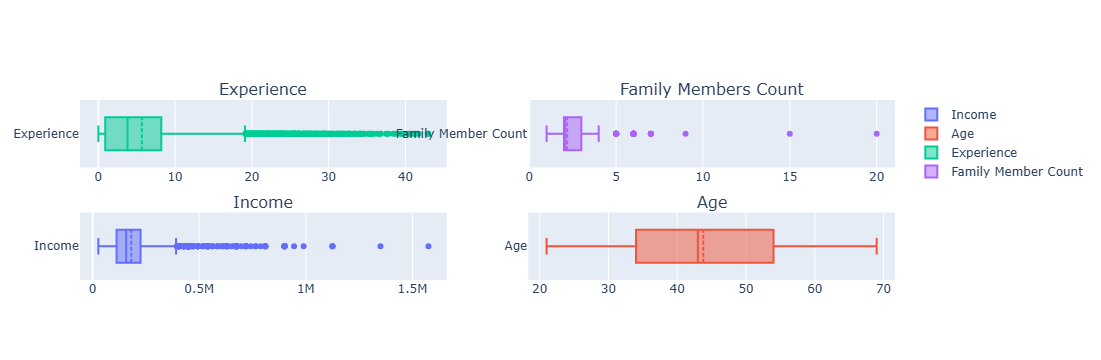

In [89]:
numerical_cols = ["Total_income","Age","Years_employed","Household_Size"]
 
fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                   subplot_titles=("Income", "Age", "Experience", "Family Members Count"))
 
fig.add_trace(go.Box(x=new_df.Total_income, name='Income',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=new_df.Age, name='Age', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=new_df.Years_employed, name='Experience', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=new_df.Household_Size, name="Family Member Count", boxmean=True),row=2, col=2)
 
fig.show()

In [90]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Education_type', 'Housing_type', 'Work_phone', 'Phone',
       'Email', 'Occupation_type', 'Num_family', 'Target', 'Account_length',
       'Age', 'Unemployed', 'Years_employed', 'Is_Working', 'Marital_status',
       'Household_Size'],
      dtype='object')

In [91]:
new_df = new_df.loc[:,['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Education_type', 'Housing_type', 'Work_phone', 'Phone',
       'Email', 'Occupation_type', 'Num_family', 'Account_length',
       'Age', 'Unemployed', 'Years_employed', 'Is_Working', 'Marital_status',
       'Household_Size','Target']]

In [92]:
new_df.head()

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0  5008804       1        0             0             0      427500.0   
1  5008806       1        0             0             0      112500.0   
2  5008808       0        1             0             0      270000.0   
3  5008812       0        1             0             0      283500.0   
4  5008815       1        0             0             0      270000.0   

  Education_type       Housing_type  Work_phone  Phone  Email Occupation_type  \
0      Secondary  House / apartment           1      0      0           other   
1      Secondary  House / apartment           0      0      0  Security staff   
2      Secondary  House / apartment           0      1      1     Sales staff   
3      Secondary  House / apartment           0      0      0           other   
4      Secondary  House / apartment           1      1      1     Accountants   

   Num_family  Account_length   Age  Unemployed  Years_employed  Is_Working  \
0         2.0              15  33.0           0            12.4           1   
1         2.0              29  59.0           0             3.1           1   
2         1.0               4  52.0           0             8.4           1   
3         1.0              20  62.0           1             0.0           0   
4         2.0               5  46.0           0             2.1           1   

   Marital_status  Household_Size  Target  
0               1               2       1  
1               1               2       0  
2               0               1       0  
3               0               1       0  
4               1               2       0

In [93]:
new_df.drop(['ID'],axis=1,inplace=True)

In [94]:
new_df.drop(['Email'],axis=1,inplace=True)

In [95]:
new_df.drop(['Work_phone'],axis=1,inplace=True)

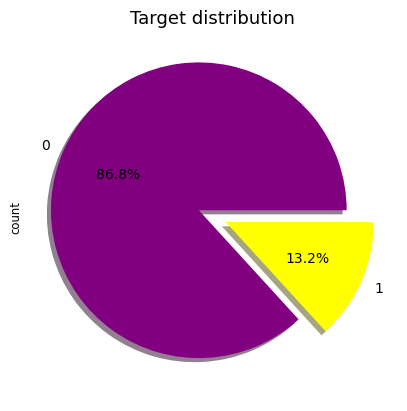

In [96]:
new_df['Target'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,
                                         colors=['purple','yellow'],textprops = {'fontsize':10}).set_title('Target distribution')

plt.show;

In [97]:
colname=[]
for x in new_df.columns:
    if new_df[x].dtype =='object':
        colname.append(x)
colname

['Education_type', 'Housing_type', 'Occupation_type']

In [98]:
for i in new_df.columns:
    print({i:new_df[i].unique()})

{'Gender': array([1, 0], dtype=int64)}
{'Own_car': array([0, 1], dtype=int64)}
{'Own_property': array([0, 1], dtype=int64)}
{'Num_children': array([ 0,  1,  3,  2,  4,  5, 14, 19,  7], dtype=int64)}
{'Total_income': array([ 427500. ,  112500. ,  270000. ,  283500. ,  135000. ,  130500. ,
        157500. ,  405000. ,  211500. ,  360000. ,  126000. ,  315000. ,
        247500. ,  297000. ,  225000. ,  166500. ,  216000. ,  255150. ,
        148500. ,  202500. ,   94500. ,  450000. ,  180000. ,   90000. ,
        765000. ,  382500. ,  144000. ,  229500. ,  292500. ,   74250. ,
         40500. ,  337500. ,  193500. ,  267750. ,  139500. ,   67500. ,
        252000. ,  900000. ,  115290. ,  279000. ,   76500. ,  234000. ,
         81000. ,  108000. ,   99000. ,  198000. ,   45000. ,  238500. ,
        117000. ,  153000. , 1350000. ,  445500. ,  495000. ,   85500. ,
        306000. ,  562500. ,  189000. ,  328500. ,  310500. ,  540000. ,
        171000. ,  675000. ,  121500. ,   72000. ,   6

In [99]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname:
    new_df[x]=le.fit_transform(new_df[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature',x)
    print('mapping',le_name_mapping)

Feature Education_type
mapping {'Academic\xa0degree': 0, 'Higher education': 1, 'Secondary': 2}
Feature Housing_type
mapping {'House / apartment': 0, 'With parents': 1}
Feature Occupation_type
mapping {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17, 'other': 18}


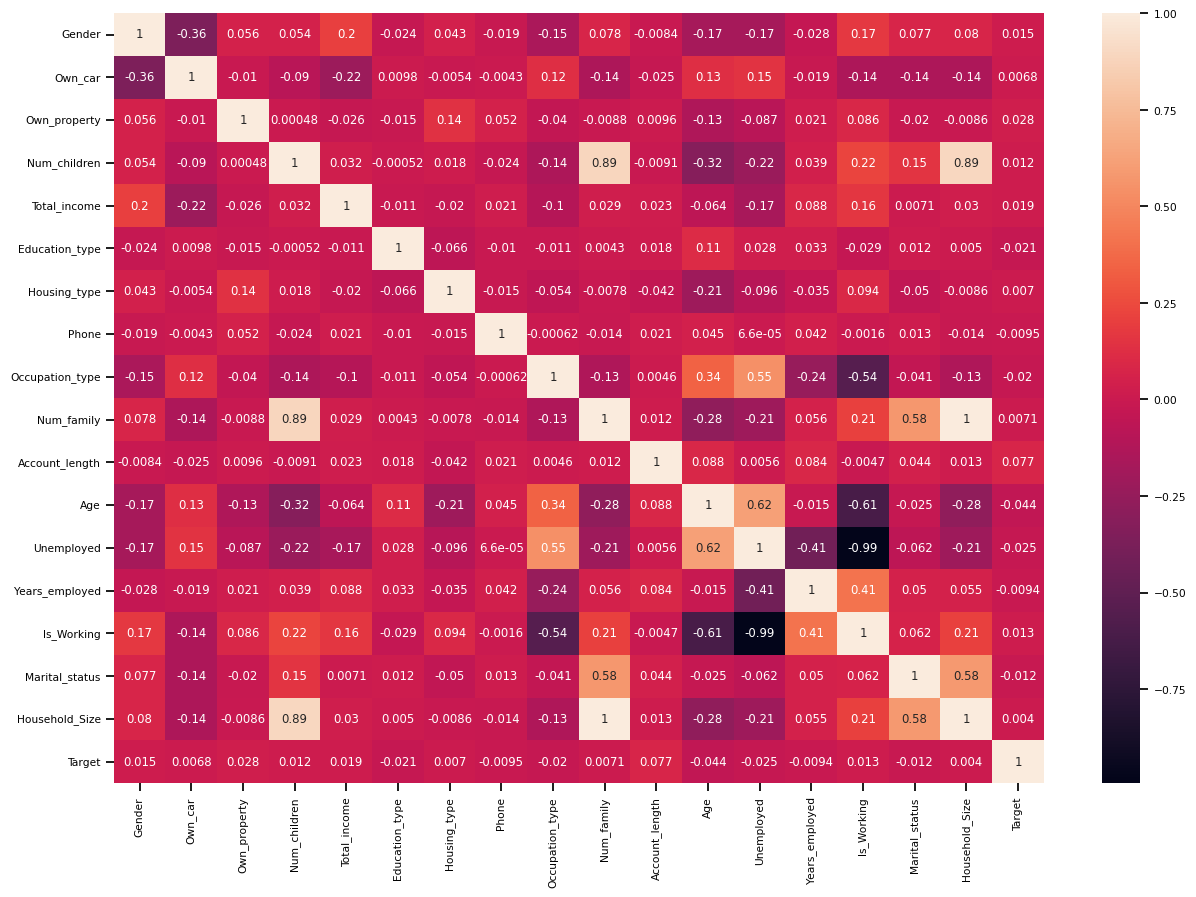

In [100]:
plt.figure(figsize=(15,10))
corr = new_df.corr()
sns.heatmap(corr,annot = True)
plt.show();

In [101]:
new_df.drop(['Num_family','Num_children','Unemployed'],axis=1,inplace=True)

In [102]:
new_df

Gender  Own_car  Own_property  Total_income  Education_type  \
0          1        0             0      427500.0               2   
1          1        0             0      112500.0               2   
2          0        1             0      270000.0               2   
3          0        1             0      283500.0               2   
4          1        0             0      270000.0               2   
...      ...      ...           ...           ...             ...   
9704       0        1             1      180000.0               2   
9705       0        1             0      112500.0               2   
9706       1        0             0       90000.0               2   
9707       0        1             0      157500.0               2   
9708       1        1             0      112500.0               2   

      Housing_type  Phone  Occupation_type  Account_length   Age  \
0                0      0               18              15  33.0   
1                0      0               16              29  59.0   
2                0      1               14               4  52.0   
3                0      0               18              20  62.0   
4                0      1                0               5  46.0   
...            ...    ...              ...             ...   ...   
9704             0      0                8              20  56.0   
9705             0      1               18              19  43.0   
9706             0      0               18              21  52.0   
9707             0      1               11              32  34.0   
9708             0      0                8              13  25.0   

      Years_employed  Is_Working  Marital_status  Household_Size  Target  
0               12.4           1               1               2       1  
1                3.1           1               1               2       0  
2                8.4           1               0               1       0  
3                0.0           0               0               1       0  
4                2.1           1               1               2       0  
...              ...         ...             ...             ...     ...  
9704             0.5           0               1               2       1  
9705             7.4           1               1               2       1  
9706             4.7           1               1               2       1  
9707             3.6           0               1               2       1  
9708             3.3           1               0               1       1  

[9709 rows x 15 columns]

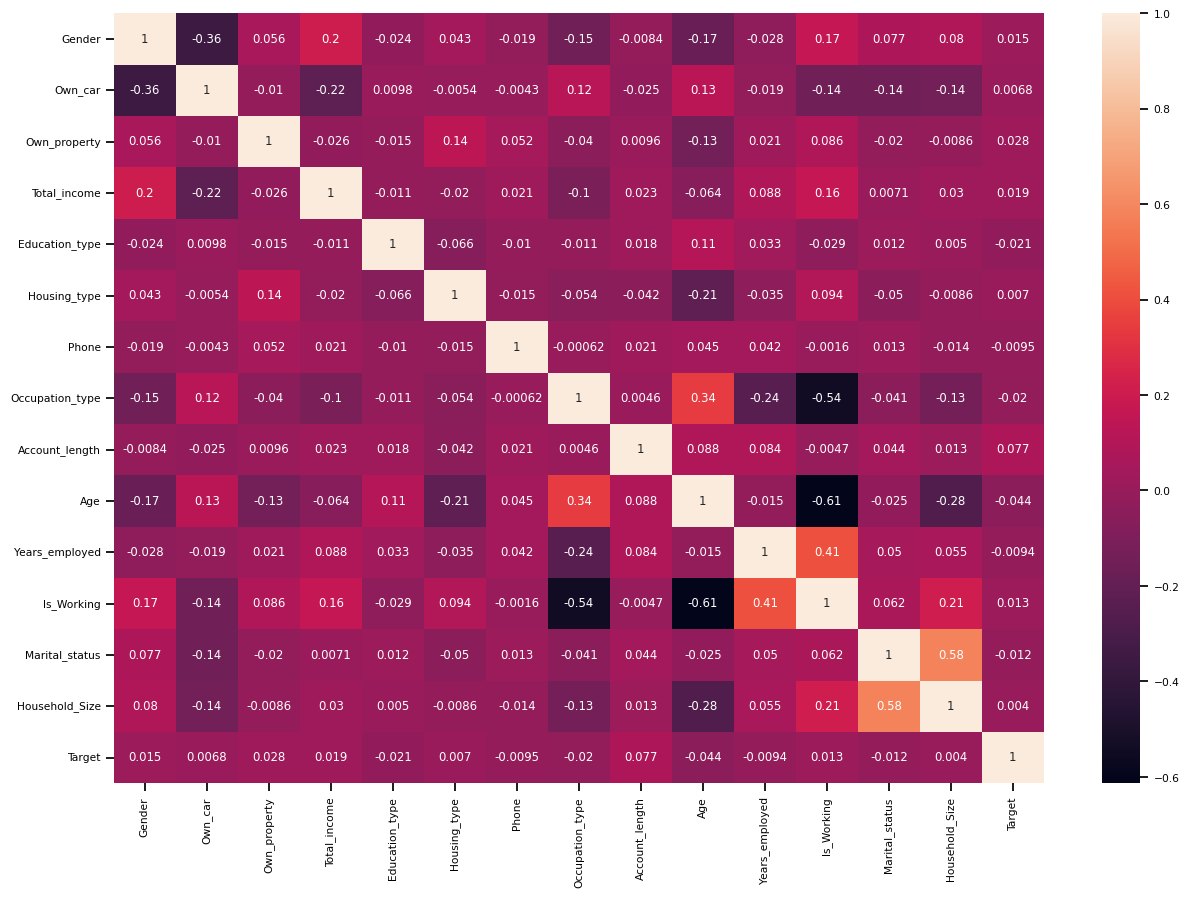

In [103]:
plt.figure(figsize=(15,10))
corr = new_df.corr()
sns.heatmap(corr,annot = True)
plt.show();

In [104]:
new_df.shape

(9709, 15)

In [105]:
new_df

Gender  Own_car  Own_property  Total_income  Education_type  \
0          1        0             0      427500.0               2   
1          1        0             0      112500.0               2   
2          0        1             0      270000.0               2   
3          0        1             0      283500.0               2   
4          1        0             0      270000.0               2   
...      ...      ...           ...           ...             ...   
9704       0        1             1      180000.0               2   
9705       0        1             0      112500.0               2   
9706       1        0             0       90000.0               2   
9707       0        1             0      157500.0               2   
9708       1        1             0      112500.0               2   

      Housing_type  Phone  Occupation_type  Account_length   Age  \
0                0      0               18              15  33.0   
1                0      0               16              29  59.0   
2                0      1               14               4  52.0   
3                0      0               18              20  62.0   
4                0      1                0               5  46.0   
...            ...    ...              ...             ...   ...   
9704             0      0                8              20  56.0   
9705             0      1               18              19  43.0   
9706             0      0               18              21  52.0   
9707             0      1               11              32  34.0   
9708             0      0                8              13  25.0   

      Years_employed  Is_Working  Marital_status  Household_Size  Target  
0               12.4           1               1               2       1  
1                3.1           1               1               2       0  
2                8.4           1               0               1       0  
3                0.0           0               0               1       0  
4                2.1           1               1               2       0  
...              ...         ...             ...             ...     ...  
9704             0.5           0               1               2       1  
9705             7.4           1               1               2       1  
9706             4.7           1               1               2       1  
9707             3.6           0               1               2       1  
9708             3.3           1               0               1       1  

[9709 rows x 15 columns]

In [106]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Total_income     9709 non-null   float64
 4   Education_type   9709 non-null   int32  
 5   Housing_type     9709 non-null   int32  
 6   Phone            9709 non-null   int64  
 7   Occupation_type  9709 non-null   int32  
 8   Account_length   9709 non-null   int64  
 9   Age              9709 non-null   float64
 10  Years_employed   9709 non-null   float64
 11  Is_Working       9709 non-null   int64  
 12  Marital_status   9709 non-null   int64  
 13  Household_Size   9709 non-null   int64  
 14  Target           9709 non-null   int32  
dtypes: float64(3), int32(4), int64(8)
memory usage: 986.2 KB


In [107]:
X = new_df.iloc[:,0:-1]
Y = new_df.iloc[:,-1]


In [108]:
print(X.shape)
print(Y.shape)

(9709, 14)
(9709,)


In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [110]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 10)

In [111]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7767, 14)
(7767,)
(1942, 14)
(1942,)


In [112]:
### Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

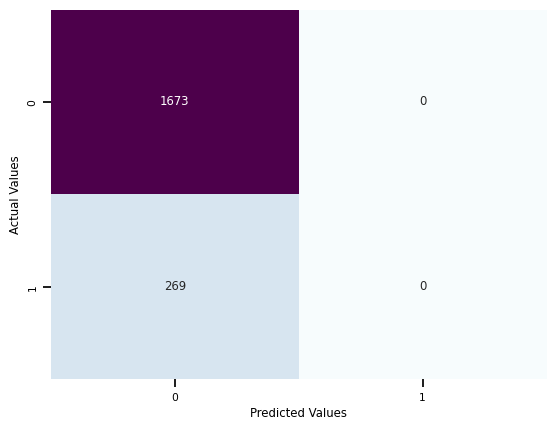

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.80      1942

Accuracy of the model:  0.8614830072090628


In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [114]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = int(np.sqrt(len(X_train))),
                                 metric='euclidean')
model_KNN.fit(X_train,Y_train)

Y_pred = model_KNN.predict(X_test)

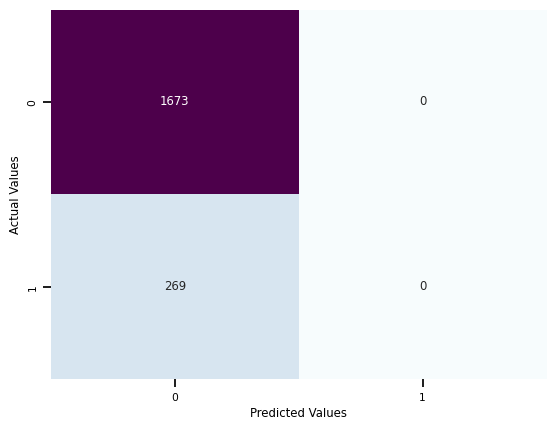

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.80      1942

Accuracy of the model:  0.8614830072090628


In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [116]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(criterion = 'entropy',max_depth=15,random_state=10)

model_DT.fit(X_train,Y_train)
Y_pred = model_DT.predict(X_test)

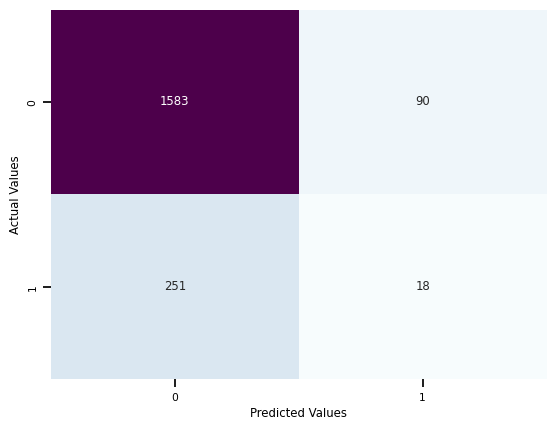

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1673
           1       0.17      0.07      0.10       269

    accuracy                           0.82      1942
   macro avg       0.51      0.51      0.50      1942
weighted avg       0.77      0.82      0.79      1942

Accuracy of the model:  0.8244078269824923


In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [118]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=63,random_state=10)

model_RF.fit(X_train,Y_train)
Y_pred = model_RF.predict(X_test)

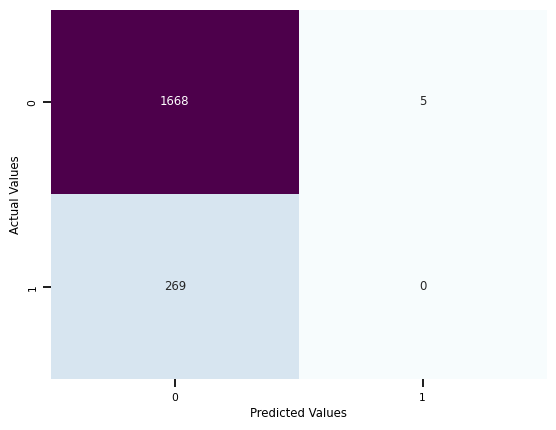

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.80      1942

Accuracy of the model:  0.858908341915551


In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [120]:
model_RF.feature_importances_

array([0.0239094 , 0.02509488, 0.02444235, 0.17622335, 0.01028829,
       0.00750616, 0.02659261, 0.08578434, 0.20100094, 0.17430995,
       0.17236628, 0.01074099, 0.01474566, 0.04699479])

In [121]:
y=new_df['Target']
x=new_df.drop(['Target'],axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


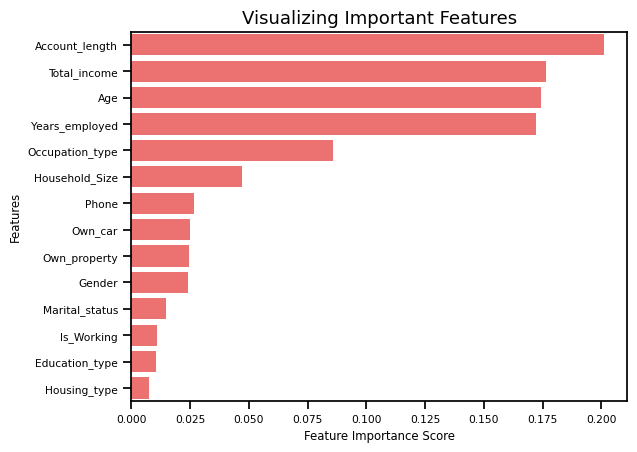

In [122]:
feature_imp = pd.Series(model_RF.feature_importances_,index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [123]:
model_RF.feature_importances_

array([0.0239094 , 0.02509488, 0.02444235, 0.17622335, 0.01028829,
       0.00750616, 0.02659261, 0.08578434, 0.20100094, 0.17430995,
       0.17236628, 0.01074099, 0.01474566, 0.04699479])

In [124]:
from sklearn.ensemble import ExtraTreesClassifier

model_ET = ExtraTreesClassifier(n_estimators=1000,random_state=10)

model_ET.fit(X_train,Y_train)
Y_pred = model_ET.predict(X_test)

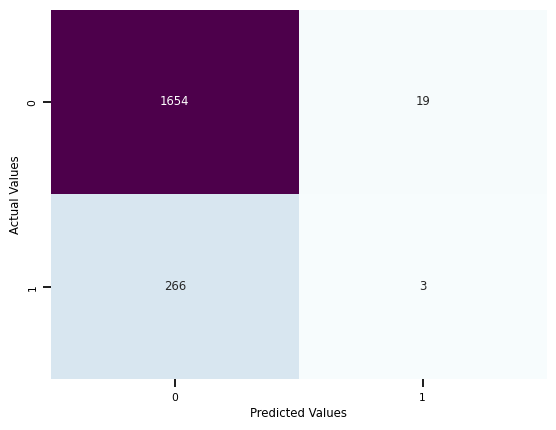

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1673
           1       0.14      0.01      0.02       269

    accuracy                           0.85      1942
   macro avg       0.50      0.50      0.47      1942
weighted avg       0.76      0.85      0.80      1942

Accuracy of the model:  0.853244078269825


In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [126]:
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost = AdaBoostClassifier(estimator = DecisionTreeClassifier(random_state=10),
                                    n_estimators = 522,
                                    random_state = 10)
model_AdaBoost.fit(X_train,Y_train)

Y_pred = model_AdaBoost.predict(X_test)

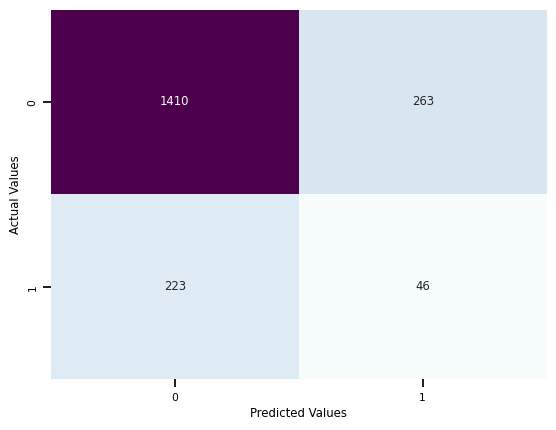

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1673
           1       0.15      0.17      0.16       269

    accuracy                           0.75      1942
   macro avg       0.51      0.51      0.51      1942
weighted avg       0.76      0.75      0.76      1942

Accuracy of the model:  0.7497425334706488


In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [128]:
!pip install xgboost

In [129]:
?XGBClassifier

Object `XGBClassifier` not found.


# XGboost

In [130]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=10000,random_state=10)

model_XGBoost.fit(X_train,Y_train)

Y_pred=model_XGBoost.predict(X_test)

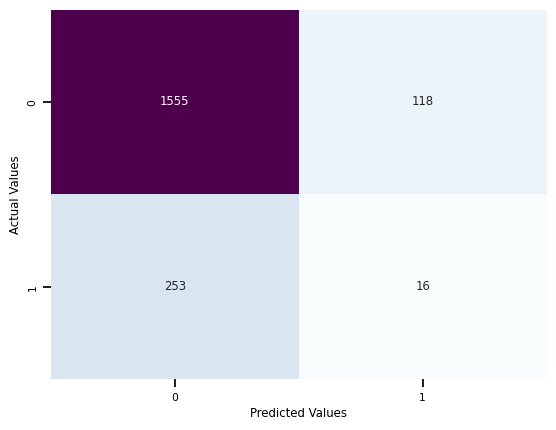

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1673
           1       0.12      0.06      0.08       269

    accuracy                           0.81      1942
   macro avg       0.49      0.49      0.49      1942
weighted avg       0.76      0.81      0.78      1942

Accuracy of the model:  0.8089598352214212


In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [132]:
!pip install imblearn

In [133]:
import sklearn.utils._param_validation

In [134]:
X= new_df.values[:,:-1]
Y=new_df.values[:,-1]

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [136]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 10)

In [137]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res==0)))

Before OverSampling, counts of label '1':  1014
Before OverSampling, counts of label '0':  6753
After OverSampling, the shape of train_X:  (13506, 14)
After OverSampling, the shape of train_y:  (13506,)
After OverSampling, counts of label '1':  6753
After OverSampling, counts of label '0':  6753


In [138]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=125,random_state=10)

model_RF.fit(X_train_res,Y_train_res)
Y_pred = model_RF.predict(X_test)

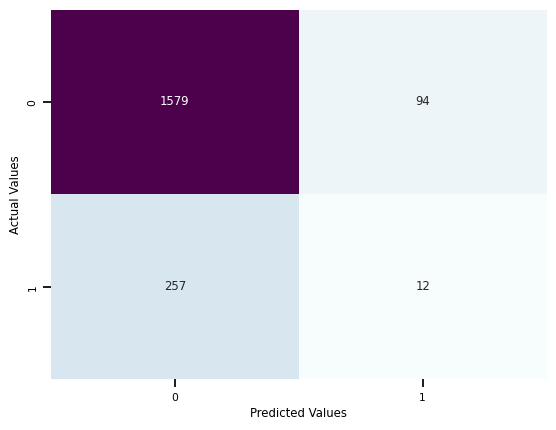

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1673
         1.0       0.11      0.04      0.06       269

    accuracy                           0.82      1942
   macro avg       0.49      0.49      0.48      1942
weighted avg       0.76      0.82      0.78      1942

Accuracy of the model:  0.8192584963954685


In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [140]:
from sklearn.ensemble import ExtraTreesClassifier

model_ET = ExtraTreesClassifier(n_estimators=50,random_state=10)

model_ET.fit(X_train_res,Y_train_res)
Y_pred = model_ET.predict(X_test)

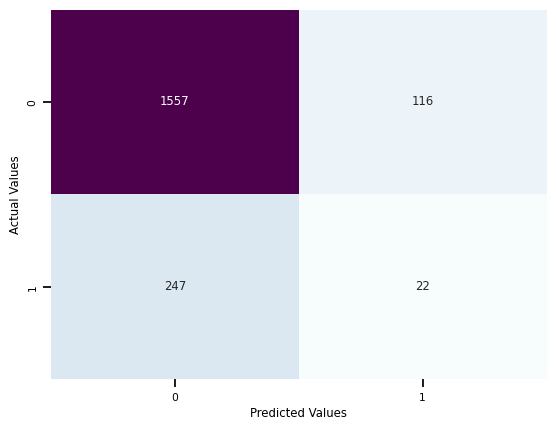

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90      1673
         1.0       0.16      0.08      0.11       269

    accuracy                           0.81      1942
   macro avg       0.51      0.51      0.50      1942
weighted avg       0.77      0.81      0.79      1942

Accuracy of the model:  0.8130792996910402


In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [142]:
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost = AdaBoostClassifier(estimator = DecisionTreeClassifier(random_state=10),
                                    n_estimators = 522,
                                    random_state = 10)
model_AdaBoost.fit(X_train_res,Y_train_res)

Y_pred = model_AdaBoost.predict(X_test)

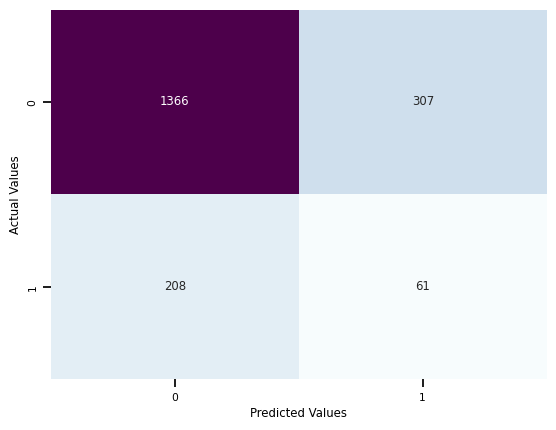

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84      1673
         1.0       0.17      0.23      0.19       269

    accuracy                           0.73      1942
   macro avg       0.52      0.52      0.52      1942
weighted avg       0.77      0.73      0.75      1942

Accuracy of the model:  0.7348094747682801


In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [144]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=10000,random_state=10)

model_XGBoost.fit(X_train_res,Y_train_res)

Y_pred=model_XGBoost.predict(X_test)

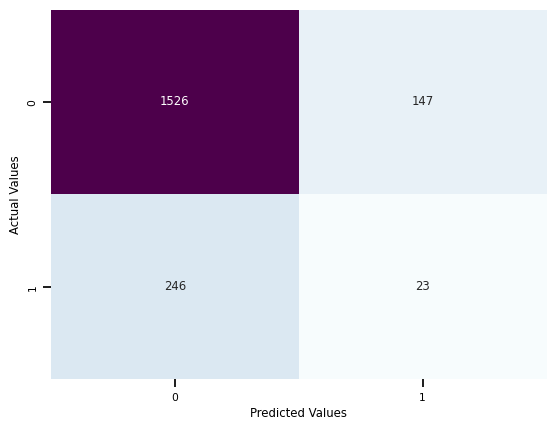

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89      1673
         1.0       0.14      0.09      0.10       269

    accuracy                           0.80      1942
   macro avg       0.50      0.50      0.50      1942
weighted avg       0.76      0.80      0.78      1942

Accuracy of the model:  0.7976313079299691


In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# logistic regression with smote

In [146]:
### Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train_res,Y_train_res)

Y_pred = classifier.predict(X_test)

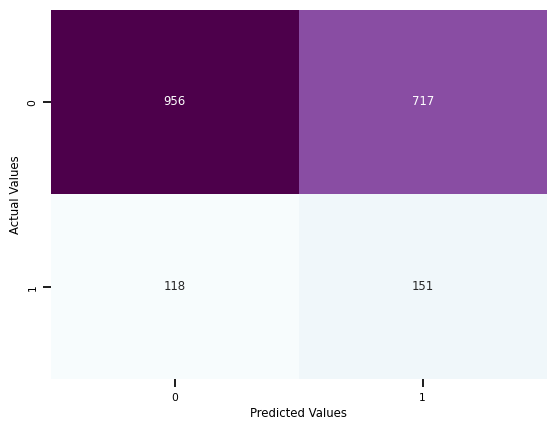

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.57      0.70      1673
         1.0       0.17      0.56      0.27       269

    accuracy                           0.57      1942
   macro avg       0.53      0.57      0.48      1942
weighted avg       0.79      0.57      0.64      1942

Accuracy of the model:  0.5700308959835222


In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# Adjusting thereshold

In [148]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.46768723 0.53231277]
 [0.56872063 0.43127937]
 [0.49307915 0.50692085]
 ...
 [0.54634939 0.45365061]
 [0.38920024 0.61079976]
 [0.58766557 0.41233443]]


In [150]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.45:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

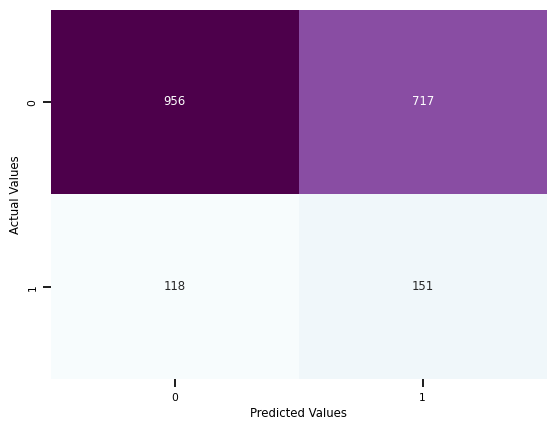

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.57      0.70      1673
         1.0       0.17      0.56      0.27       269

    accuracy                           0.57      1942
   macro avg       0.53      0.57      0.48      1942
weighted avg       0.79      0.57      0.64      1942

Accuracy of the model:  0.5700308959835222


In [151]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [152]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1466  , type 2 error : 17  , type 1 error: 1449
Errors at threshold  0.41000000000000003 : 1413  , type 2 error : 21  , type 1 error: 1392
Errors at threshold  0.42000000000000004 : 1352  , type 2 error : 22  , type 1 error: 1330
Errors at threshold  0.43000000000000005 : 1297  , type 2 error : 33  , type 1 error: 1264
Errors at threshold  0.44000000000000006 : 1221  , type 2 error : 42  , type 1 error: 1179
Errors at threshold  0.45000000000000007 : 1165  , type 2 error : 52  , type 1 error: 1113
Errors at threshold  0.4600000000000001 : 1107  , type 2 error : 64  , type 1 error: 1043
Errors at threshold  0.4700000000000001 : 1036  , type 2 error : 78  , type 1 error: 958
Errors at threshold  0.4800000000000001 : 958  , type 2 error : 89  , type 1 error: 869
Errors at threshold  0.4900000000000001 : 899  , type 2 error : 106  , type 1 error: 793
Errors at threshold  0.5000000000000001 : 835  , type 2 error : 118  , type 1 error: 717
Errors at threshold  0.51

In [153]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = int(np.sqrt(len(X_train_res))),
                                 metric='euclidean')
model_KNN.fit(X_train_res,Y_train_res)

Y_pred = model_KNN.predict(X_test)

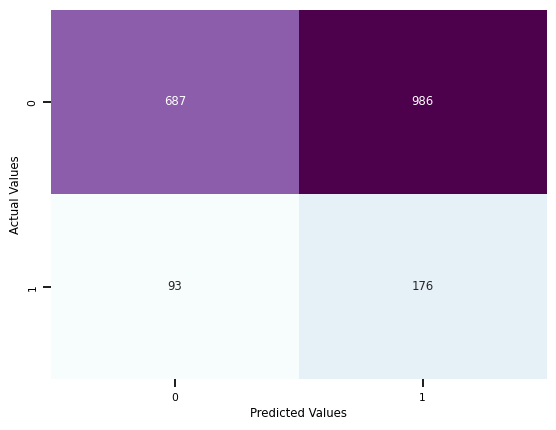

Classification report:
              precision    recall  f1-score   support

         0.0       0.88      0.41      0.56      1673
         1.0       0.15      0.65      0.25       269

    accuracy                           0.44      1942
   macro avg       0.52      0.53      0.40      1942
weighted avg       0.78      0.44      0.52      1942

Accuracy of the model:  0.44438722966014416


In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# Early Stopping Zero convergence with dt and adaboost

In [155]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
 
# Define the initial model with the maximum number of estimators
initial_n_estimators = 200
model_AdaBoost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=10),
    n_estimators=initial_n_estimators,
    random_state=10
)
 
# Split your training data into training and validation sets
X_train_sub, X_val, Y_train_sub, Y_val = train_test_split(X_train_res, Y_train_res, test_size=0.2, random_state=42)
 
# Fit the initial model on the training subset
model_AdaBoost.fit(X_train_sub, Y_train_sub)
 
# Initialize variables for early stopping
best_val_score = -np.inf
n_no_improvement = 0
early_stop_rounds = 10  # number of rounds with no improvement to stop training early
best_n_estimators = initial_n_estimators
 
# Iterate over staged predictions to implement early stopping
for i, y_pred in enumerate(model_AdaBoost.staged_predict(X_val)):
    val_score = accuracy_score(Y_val, y_pred)
    if val_score > best_val_score:
        best_val_score = val_score
        n_no_improvement = 0
        best_n_estimators = i + 1
    else:
        n_no_improvement += 1
    if n_no_improvement >= early_stop_rounds:
        print(f"Early stopping at iteration {i + 1}")
        break
 
# Train the final model using the best number of estimators
final_model_AdaBoost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=10),
    n_estimators=best_n_estimators,
    random_state=10
)
final_model_AdaBoost.fit(X_train_res, Y_train_res)
 
# Predict on the test set
Y_pred = final_model_AdaBoost.predict(X_test)
print(f"Test Accuracy: {accuracy_score(Y_test, Y_pred)}")

Early stopping at iteration 12
Test Accuracy: 0.8094747682801235


# with grid search cv

In [156]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
 
# Define the parameter grid for XgBoostClassifier
param_grid = {
    'n_estimators': [50, 100, 200,555,2000,2324,4545,9000],
    'learning_rate': [0.01, 0.1,0.5,0.8]
}
 
# Initialize XGBoostClassifier with a base estimator
xg_boost = XGBClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=10),  # Base estimator
    random_state=10
)
 
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xg_boost,
    param_grid=param_grid,
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',
    n_jobs=-1
)
 
# Fit GridSearchCV
grid_search.fit(X_train_res, Y_train_res)
 
# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
 
# Use the best estimator for predictions
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

Best parameters: {'learning_rate': 0.01, 'n_estimators': 4545}
Best score: 0.8972507646508641


# GradientBoostingClassifier

In [158]:
### from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
 
# Define the initial model with the maximum number of estimators
initial_n_estimators = 200
model_GradientBoosting = GradientBoostingClassifier(
    n_estimators=initial_n_estimators,
    random_state=10
)
 
# Split your training data into training and validation sets
X_train_sub, X_val, Y_train_sub, Y_val = train_test_split(X_train_res, Y_train_res, test_size=0.2, random_state=42)
 
# Fit the initial model on the training subset
model_GradientBoosting.fit(X_train_sub, Y_train_sub)
 
# Initialize variables for early stopping
best_val_score = -np.inf
n_no_improvement = 0
early_stop_rounds = 10  # number of rounds with no improvement to stop training early
best_n_estimators = initial_n_estimators
 
# Iterate over staged predictions to implement early stopping
for i, y_pred in enumerate(model_GradientBoosting.staged_predict(X_val)):
    val_score = accuracy_score(Y_val, y_pred)
    if val_score > best_val_score:
        best_val_score = val_score
        n_no_improvement = 0
        best_n_estimators = i + 1
    else:
        n_no_improvement += 1
    if n_no_improvement >= early_stop_rounds:
        print(f"Early stopping at iteration {i + 1}")
        break
 
# Train the final model using the best number of estimators
final_model_GradientBoosting = GradientBoostingClassifier(
    n_estimators=best_n_estimators,
    random_state=10
)
final_model_GradientBoosting.fit(X_train_res, Y_train_res)
 
# Predict on the test set
Y_pred = final_model_GradientBoosting.predict(X_test)
print(f"Test Accuracy: {accuracy_score(Y_test, Y_pred)}")

Early stopping at iteration 186
Test Accuracy: 0.8069001029866117


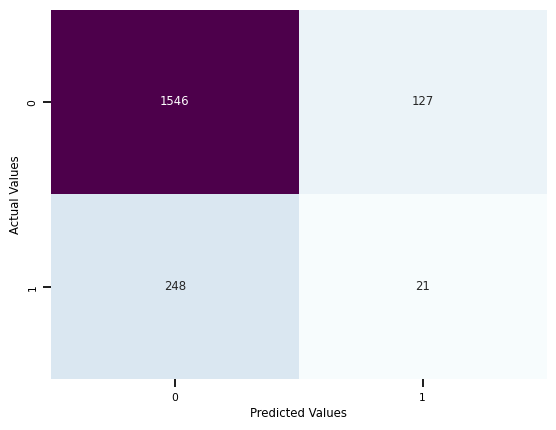

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      1673
         1.0       0.14      0.08      0.10       269

    accuracy                           0.81      1942
   macro avg       0.50      0.50      0.50      1942
weighted avg       0.76      0.81      0.78      1942

Accuracy of the model:  0.8069001029866117


In [159]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
# As we saw smote  Logistic regression and ada boost performed well
